In [4]:
%reload_ext autoreload
%autoreload 2
import psycopg2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

import os
from pandas import DataFrame, read_sql
import pandas
from pandas import DataFrame, to_datetime
from IPython.display import display
path = os.path.expanduser('~')
import datetime as dt
from sklearn import preprocessing
#from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, precision_recall_curve
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import minmax_scale

from sklearn.metrics import r2_score,mean_squared_error
import time

In [13]:
# Load the data
#df = pd.read_csv('/Users/Javier/Jupyter/dataset_for_ad_index_phone_accurated_params_no_mandatory.csv')
df = pd.read_csv('/Users/cristobal.rojas/Documents/Content_Index/Python/dataset_for_ad_index_phone_accurated_params_no_mandatory.csv', encoding = "ISO-8859-1")
#df = pd.read_csv('/Users/cristobal.rojas/Documents/Jupyter\ yapo/dataset_for_ad_index_phone_accurated_params_no_mandatory.csv')

In [14]:
df_save = df

In [15]:
df

ad_id_pk approval_date ad_type  category_main_id_pk  \
0      71509567    2018-10-01    sell                    3   
1      71506728    2018-10-01    sell                    3   
2      71502709    2018-10-01    sell                    3   
3      71509832    2018-10-01    sell                    3   
4      71510522    2018-10-01    sell                    3   
5      71485460    2018-10-01    sell                    3   
6      71487663    2018-10-01    sell                    3   
7      71477164    2018-10-01    sell                    3   
8      71490167    2018-10-01    sell                    3   
9      71495536    2018-10-01    sell                    3   
10     71478771    2018-10-01    sell                    3   
11     71495344    2018-10-01    sell                    3   
12     71478031    2018-10-01    sell                    3   
13     71500326    2018-10-01    sell                    3   
14     71475408    2018-10-01    sell                    3   
15     71480645    2018-10-01    sell                    3   
16     71510085    2018-10-01    sell                    3   
17     71481400    2018-10-01    sell                    3   
18     71491616    2018-10-01    sell                    3   
19     71502486    2018-10-01    sell                    3   
20     71510064    2018-10-01    sell                    3   
21     71477033    2018-10-01    sell                    3   
22     71480117    2018-10-01    sell                    3   
23     71482781    2018-10-01    sell                    3   
24     71477184    2018-10-01    sell                    3   
25     71497804    2018-10-01    sell                    3   
26     71503203    2018-10-01    sell                    3   
27     71508663    2018-10-01    sell                    3   
28     71489589    2018-10-01    sell                    3   
29     71490226    2018-10-01    sell                    3   
...         ...           ...     ...                  ...   
28615  71060765    2018-09-17    sell                    3   
28616  71065189    2018-09-17    sell                    3   
28617  71064925    2018-09-17    sell                    3   
28618  71054741    2018-09-17    sell                    3   
28619  71058583    2018-09-17    sell                    3   
28620  71056077    2018-09-17    sell                    3   
28621  71060869    2018-09-17    sell                    3   
28622  71061877    2018-09-17    sell                    3   
28623  71065105    2018-09-17    sell                    3   
28624  70860399    2018-09-17    sell                    3   
28625  71056932    2018-09-17    sell                    3   
28626  71052371    2018-09-17    sell                    3   
28627  71053583    2018-09-17    sell                    3   
28628  71061661    2018-09-17    sell                    3   
28629  71057838    2018-09-17    sell                    3   
28630  71060346    2018-09-17    sell                    3   
28631  71056578    2018-09-17    sell                    3   
28632  71057817    2018-09-17    sell                    3   
28633  71060575    2018-09-17    sell                    3   
28634  71064349    2018-09-17    sell                    3   
28635  71058634    2018-09-17    sell                    3   
28636  71059313    2018-09-17    sell                    3   
28637  71053771    2018-09-17    sell                    3   
28638  71058170    2018-09-17    sell                    3   
28639  71064072    2018-09-17    sell                    3   
28640  71055133    2018-09-17    sell                    3   
28641  71055950    2018-09-17    sell                    3   
28642  71058432    2018-09-17    sell                    3   
28643  71061106    2018-09-17    sell                    3   
28644  71066566    2018-09-17    sell                    3   

               category_main_name  category_id_fk  \
0      Computadores & electrónica              30   
1      Computadores & electrónica              30   
2  

In [16]:
## Creation of function
def value_between_q1_q3(x):
    if ((x>= 0.5) & (x<=0.66)):
        return 1
    else:
        return 0
## para esta categoria solo aplica 1 y 0 ya que tiene solo 1 parametro no mandatorio    
def value_median(x):
    #if (x <= 0.5):
    if (x == 0.1):
        return 1
    else:
        return 0

def no_appropiate_value(x):
    if (x == None) | (x <=0.10) | (x >= 1):
        return 0
    else:
        return 1
    
def nof_photos(x):
    if (x == None):
        return 0
    elif (x <= 0.5):
        return 1
    else:
        return 2 
    
def resol(x):
    if (x == None):
        return 0
    elif (x < 200):
        return 1/3
    else:
        return 1

In [17]:
df.price_quartil_num.unique()

array([0.33, 0.5 , 0.66, 0.9 , 0.1 , 1.  ,  nan])

In [18]:
df['params'] = df['params'].fillna(0)

In [19]:
df['C_price'] = df['price_quartil_num'].apply(no_appropiate_value)

In [20]:
df['C_full_description'] = df['len_full_description_quartil_num'].apply(value_between_q1_q3)

In [21]:
df['C_photos'] = df['photos_quartil_num'].apply(nof_photos)

In [22]:
df['C_resol'] = df['mean_resol'].apply(resol)

In [23]:
df['C_params'] = df['params_quartil_num'].apply(value_median)

In [24]:
with pd.option_context('display.max_columns', None):
    print(df)

       ad_id_pk approval_date ad_type  category_main_id_pk  \
0      71509567    2018-10-01    sell                    3   
1      71506728    2018-10-01    sell                    3   
2      71502709    2018-10-01    sell                    3   
3      71509832    2018-10-01    sell                    3   
4      71510522    2018-10-01    sell                    3   
5      71485460    2018-10-01    sell                    3   
6      71487663    2018-10-01    sell                    3   
7      71477164    2018-10-01    sell                    3   
8      71490167    2018-10-01    sell                    3   
9      71495536    2018-10-01    sell                    3   
10     71478771    2018-10-01    sell                    3   
11     71495344    2018-10-01    sell                    3   
12     71478031    2018-10-01    sell                    3   
13     71500326    2018-10-01    sell                    3   
14     71475408    2018-10-01    sell                    3   
15     7

In [25]:
df['total_punt'] = df['C_price'] + df['C_full_description'] + df['C_photos']*df['C_resol'] + df['C_params']

In [26]:
df['max_punt'] = df['must_be_price']*1+1+2+df['must_have_params']*1

In [27]:
df['max_punt'].value_counts(),100*df['max_punt'].value_counts(normalize=True)

(5    28645
 Name: max_punt, dtype: int64, 5    100.0
 Name: max_punt, dtype: float64)

In [36]:
df['ad_index'] = round(df['total_punt']/df['max_punt']*5)

In [37]:
keep_description =  ['category_name','product_name','subject', 'body', 'len_subject', 'len_body',
       'len_full_description_quartil']

keep_price =  ['ad_type','must_be_price','price',  
               'price_missing','price_quartil'] 

keep_photos =  ['photos', 'mean_resol','photos_quartil']


keep_params =  ['must_have_params','total_params_per_category','params', 
       'params_quartil']

var_output = ['ad_reply_first_week','visits','total_punt','max_punt']

In [38]:
pd.set_option('display.max_colwidth', -1)

In [39]:
def testing_ad_index(X,k):
    aux = X[X['ad_index']==k]
    if aux.shape[0] > 0:
        index = aux.sample(1).index[0]
        display(df[df.index == index][keep_description])
        display(df[df.index == index][keep_price])
        display(df[df.index == index][keep_photos])
        display(df[df.index == index][keep_params])
        return index
    else:
        print('there are not ads with these score')
        
def testing_ad_index(X,index):
    display(df[df.index == index][keep_description])
    display(df[df.index == index][keep_price])
    display(df[df.index == index][keep_photos])
    display(df[df.index == index][keep_params])
    return index

        
def testing_output_ad_index(X,index):
    display(df[df.index == index][var_output])

In [40]:
index = testing_ad_index(df,3)

category_name product_name                   subject  \
3  Celulares, teléfonos y accesorios  iphone 6     IPhone 6 space grey 32GB   

                                                                                                                                                                                                                                                                                                                                        body  \
3  Vendo iPhone 6 de 32gb en muy buen estado, siempre usado con carcasa protectora solo el problema de la foto 3 ( se golpeo y quedó presionada la tecla de subir volumen) no afecta en nada el funcionamiento del equipo. liberado para cualquier compañía sin riesgo de bloque alguno\n\nEn su caja con el cargador y audífonos originales   

   len_subject  len_body len_full_description_quartil  
3  5            57        q090

ad_type  must_be_price     price  price_missing price_quartil
3  sell    1              150000.0  0.0            q3

photos  mean_resol photos_quartil
3  5.0     172.0       q3

must_have_params  total_params_per_category  params params_quartil
3  1                 1                          1.0     q010

In [42]:
testing_output_ad_index(df,index)

ad_reply_first_week  visits  total_punt  max_punt
3  4.0                  47      2.666667    5

In [34]:
def visualize_quality_ad(X,target,prod = " "):
    fig, ax1 = plt.subplots()
    ax2 = ax1.twinx()
    aux = 100* X['ad_index'].value_counts(normalize=True).sort_index()
    aux.plot(kind='bar',ax = ax1)
    # Adding the average of the tarhget for every index
    X.groupby('ad_index')[target].mean().plot(ax = ax2,color='green')
    ax1.set_xlabel('Ad Index')
    ax1.set_ylabel('% Ads')
    ax2.set_ylabel('Mean of # ' + target + ' received first week')
    fig.suptitle(prod + ' Volume and mean of ' + target + ' per ad index')

(None, None)

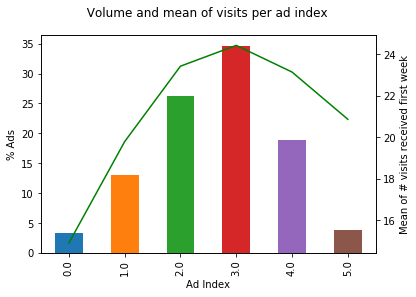

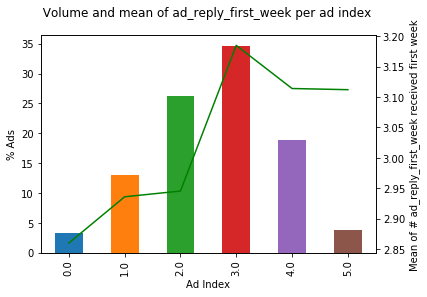

In [43]:
visualize_quality_ad(df,'visits'), visualize_quality_ad(df,'ad_reply_first_week') 

/anaconda3/envs/basic_env/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


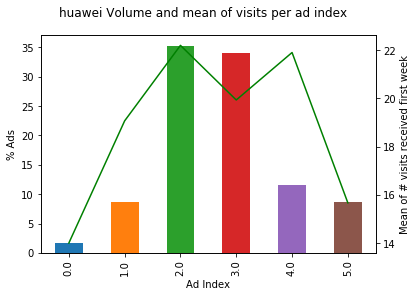

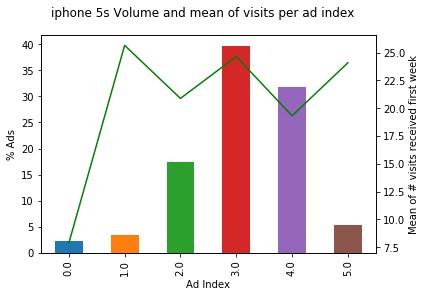

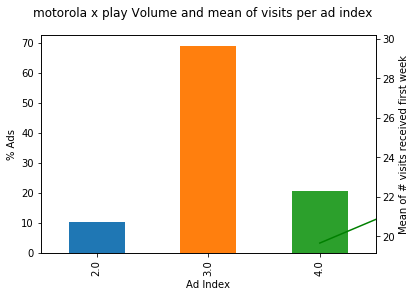

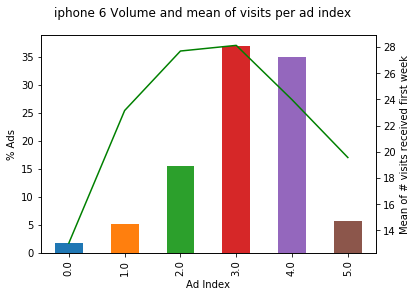

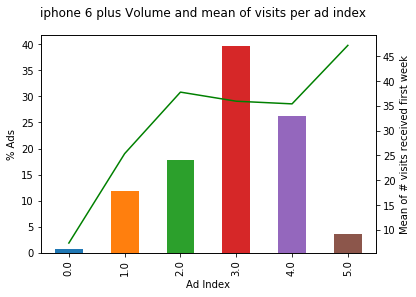

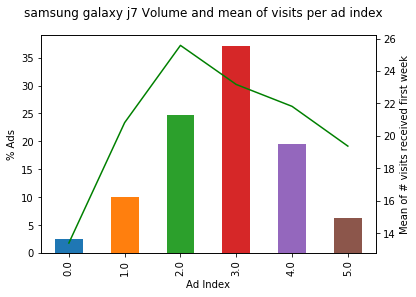

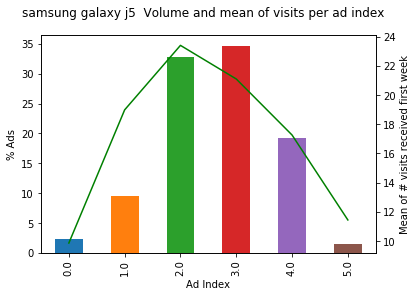

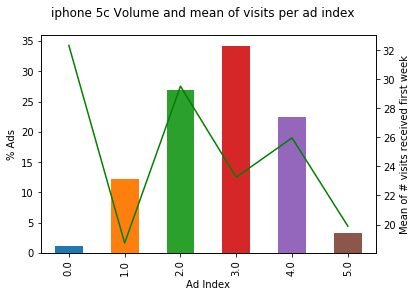

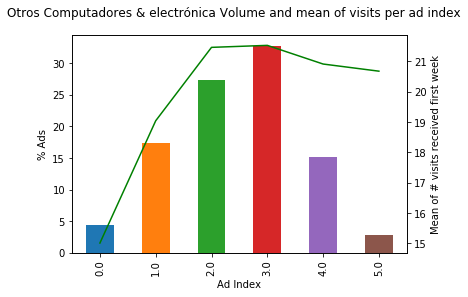

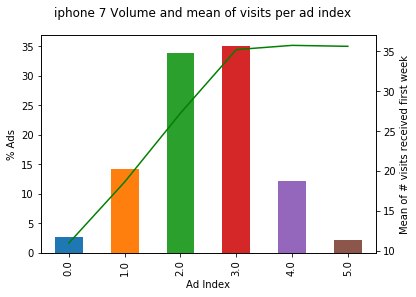

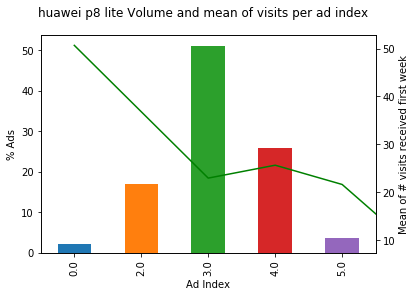

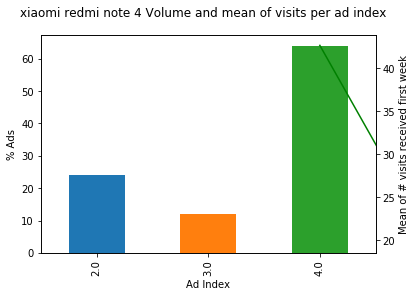

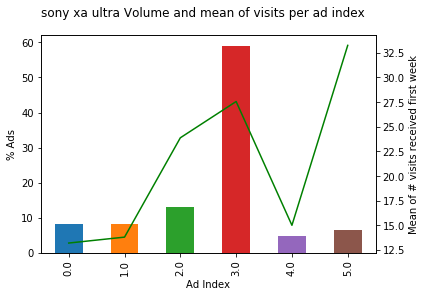

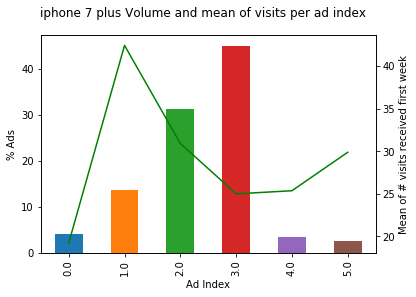

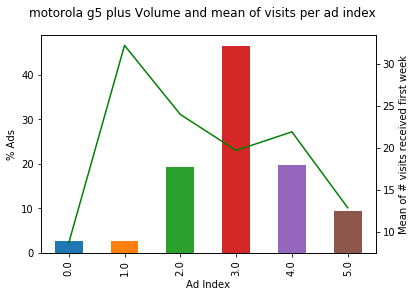

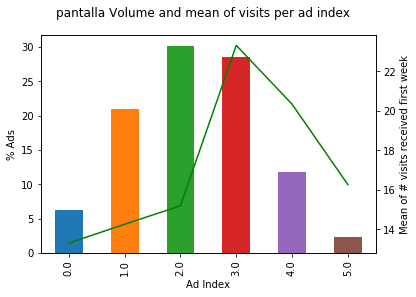

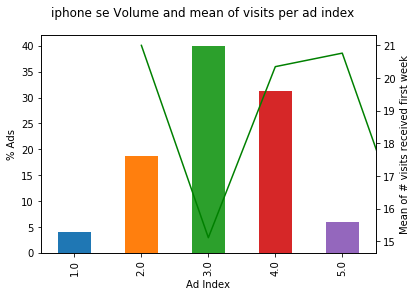

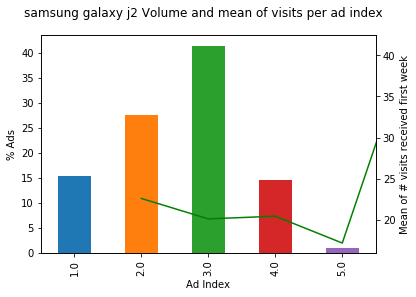

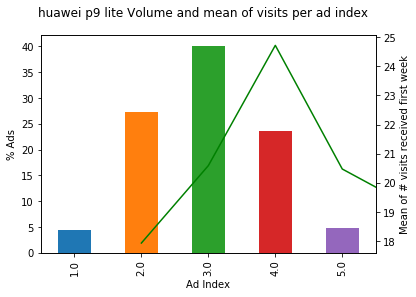

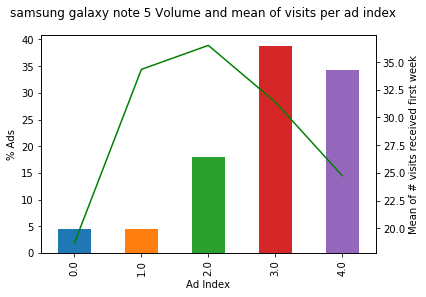

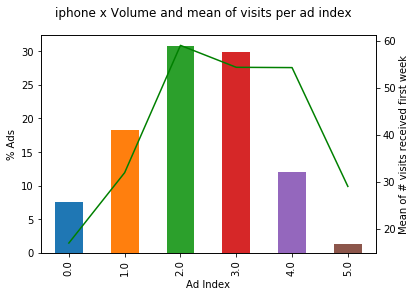

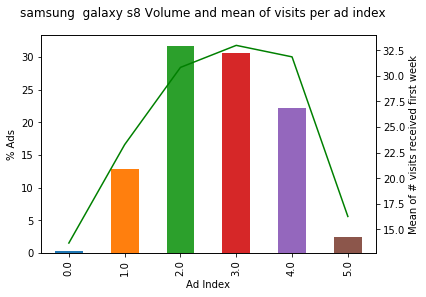

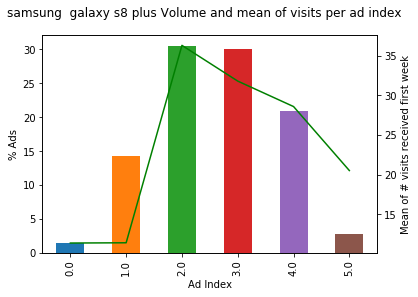

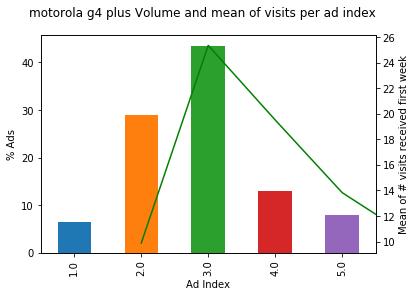

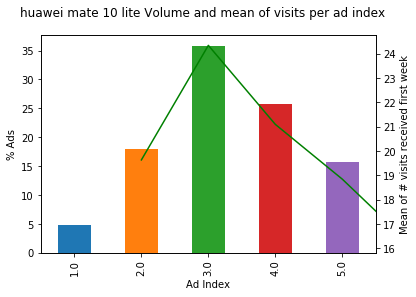

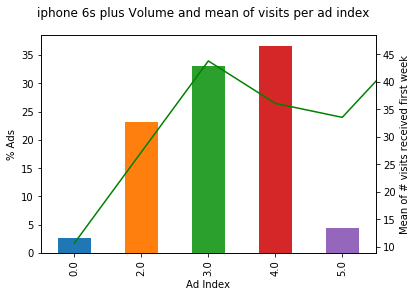

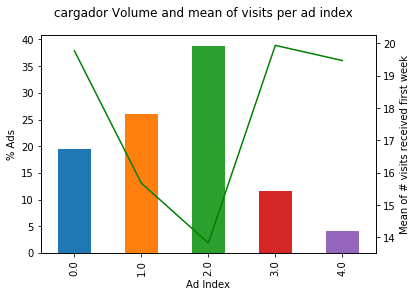

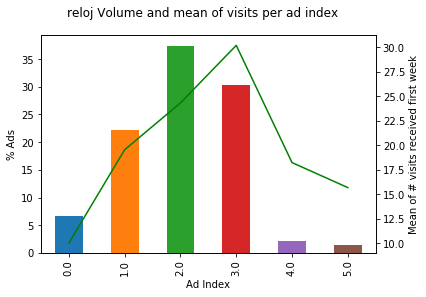

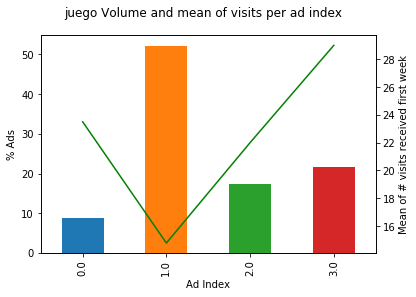

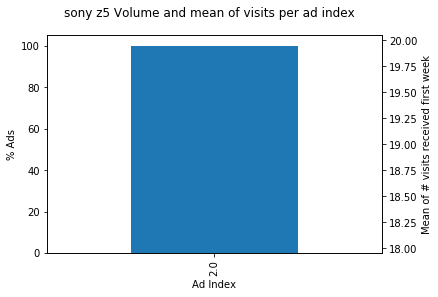

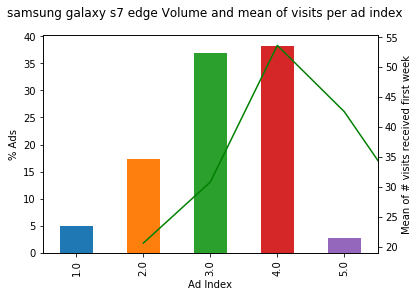

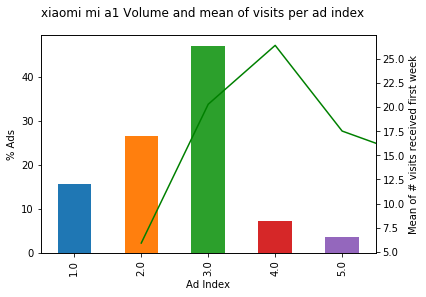

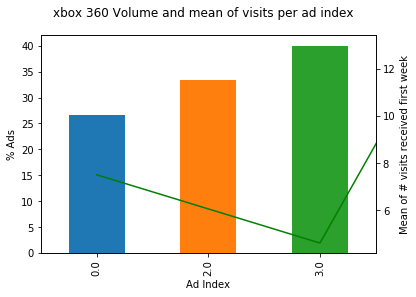

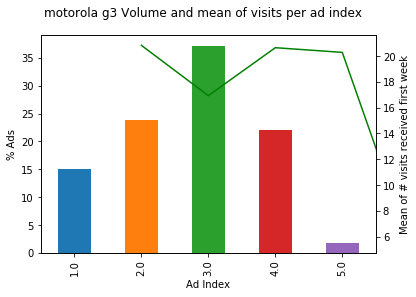

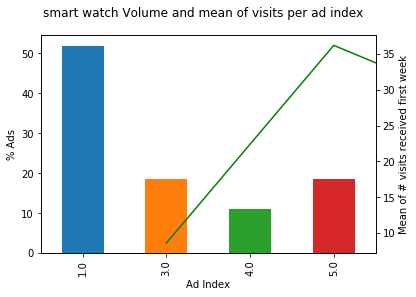

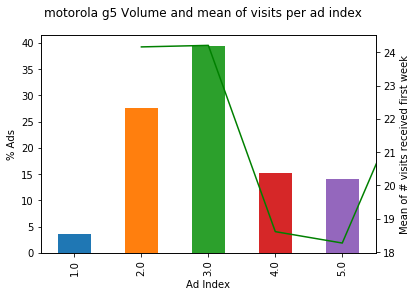

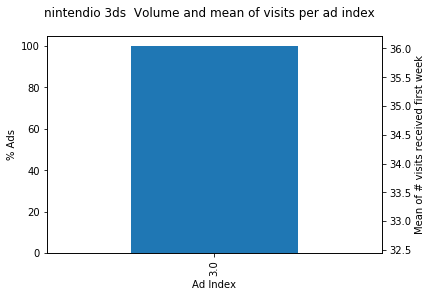

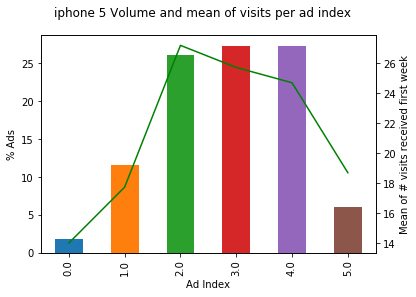

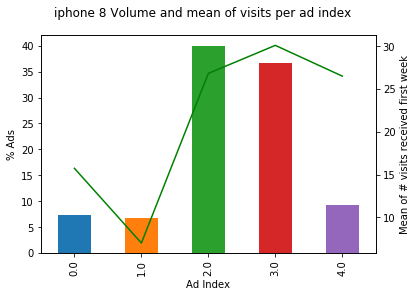

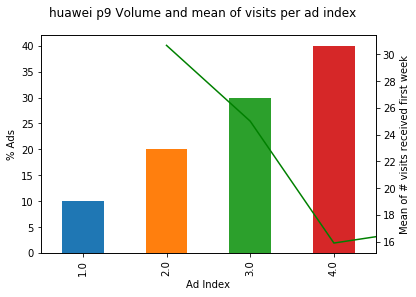

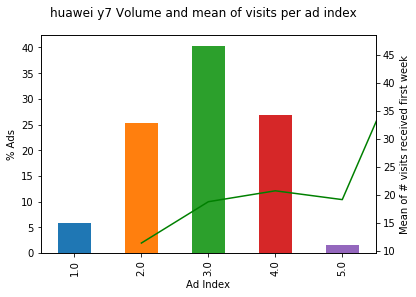

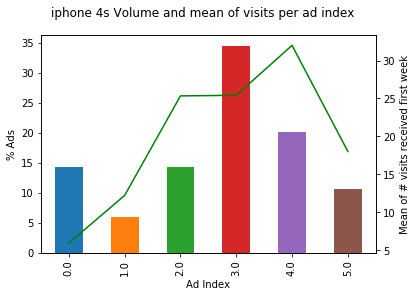

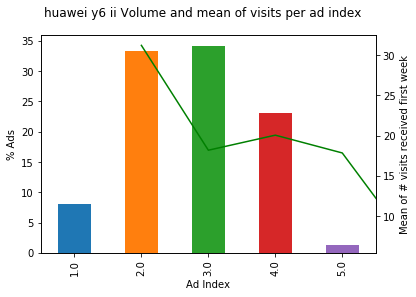

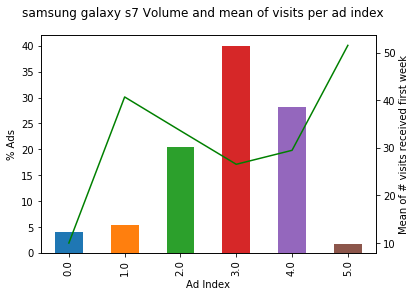

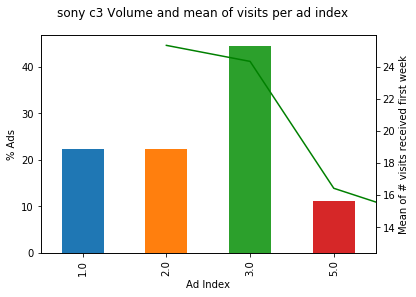

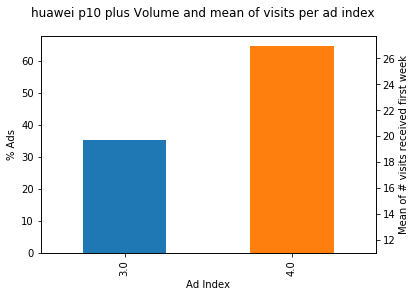

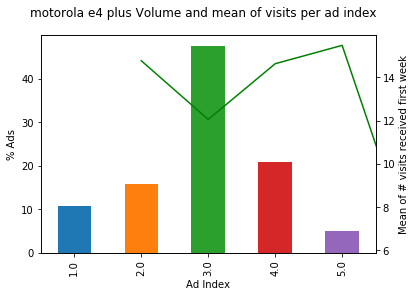

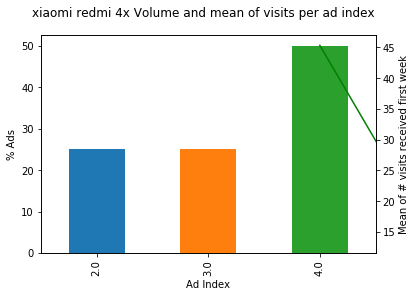

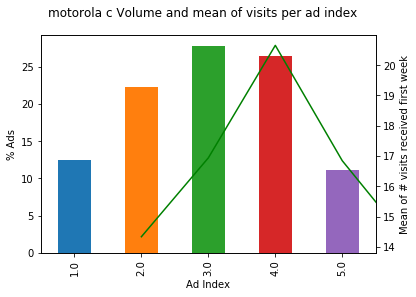

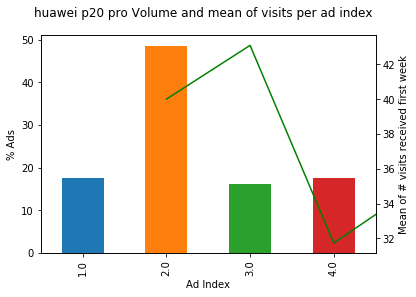

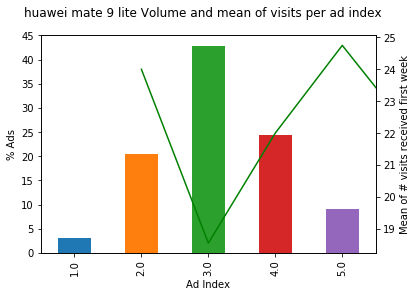

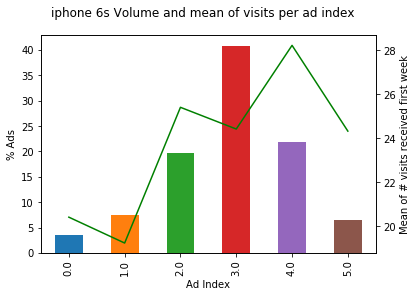

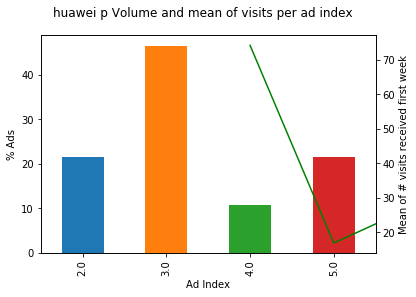

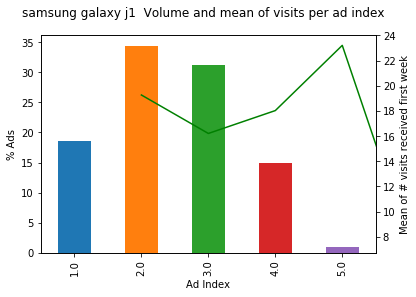

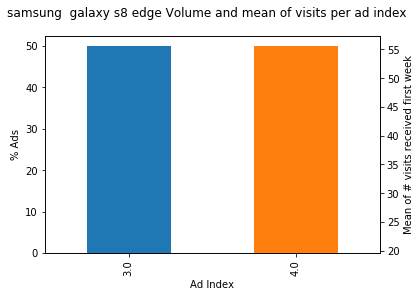

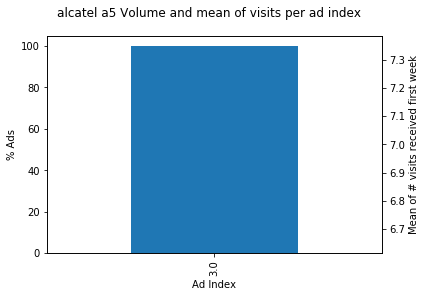

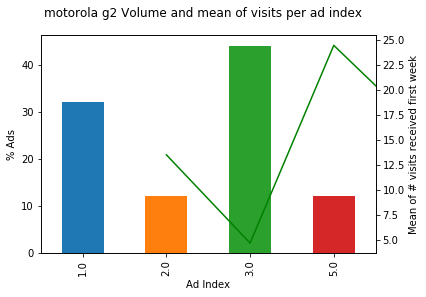

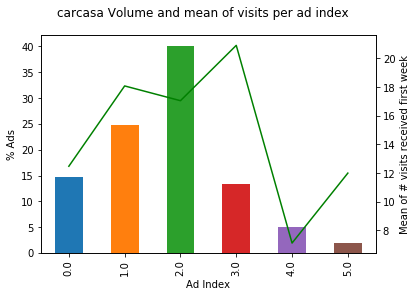

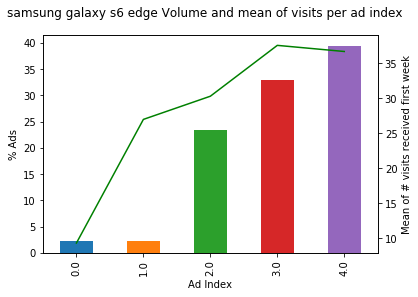

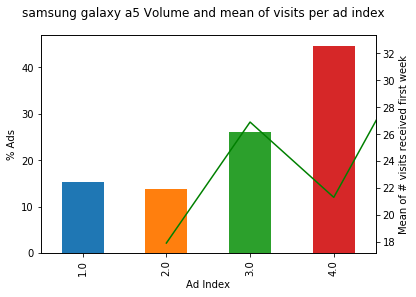

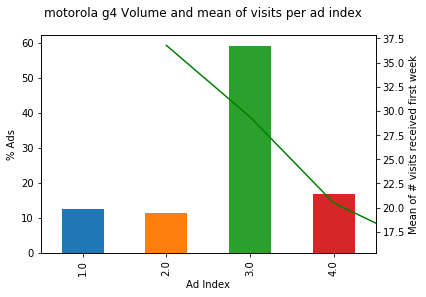

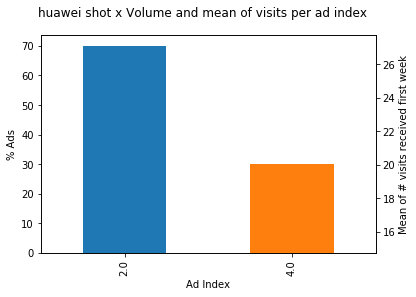

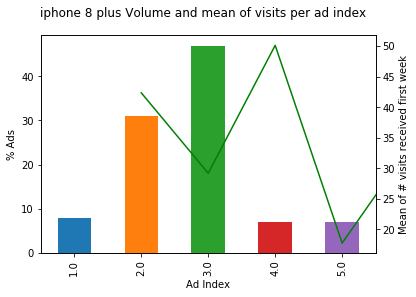

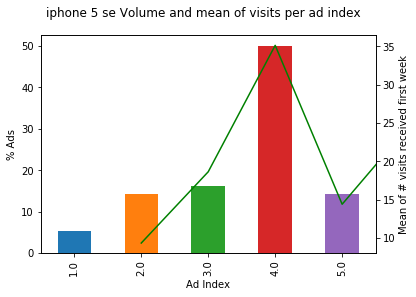

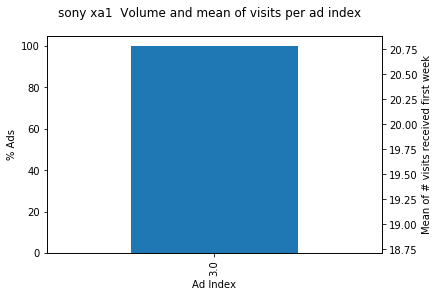

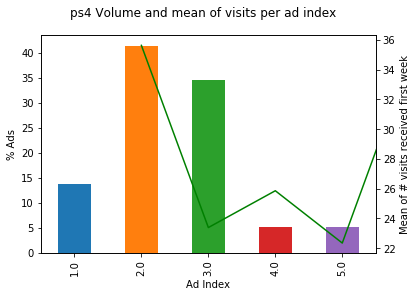

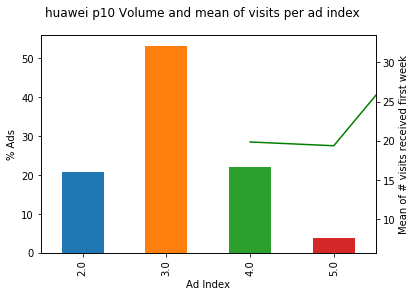

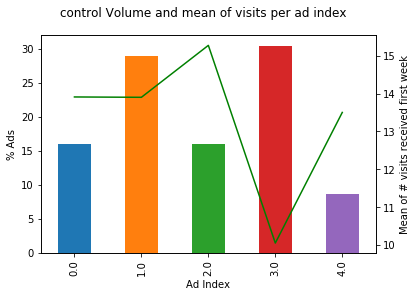

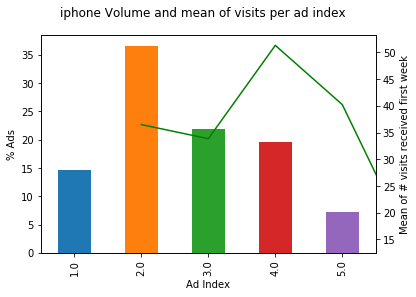

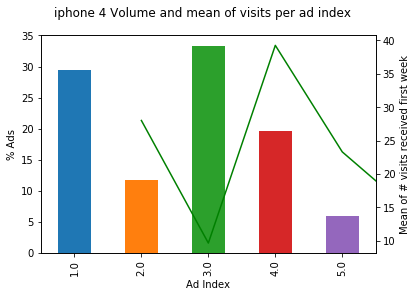

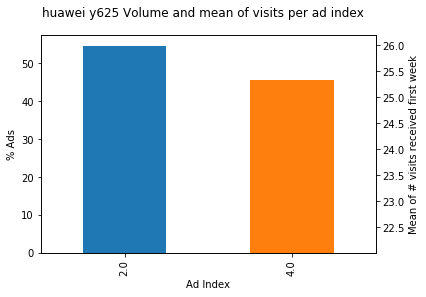

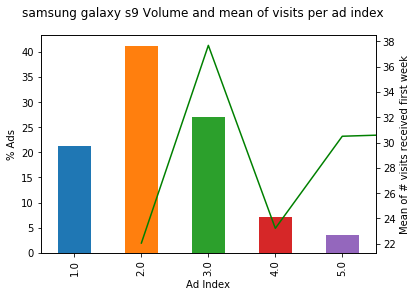

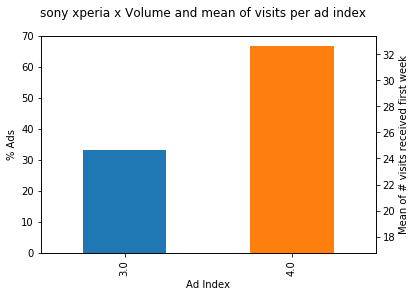

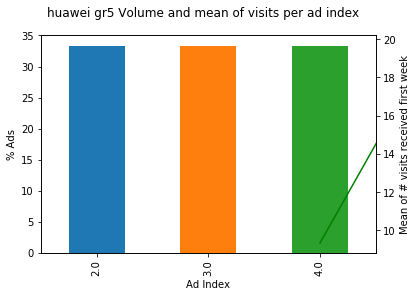

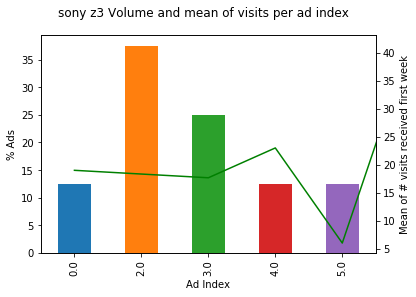

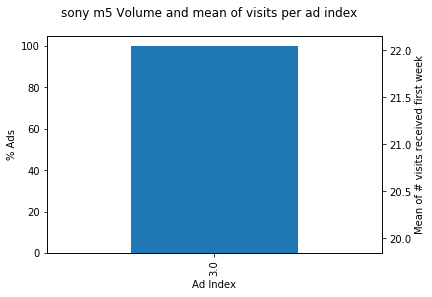

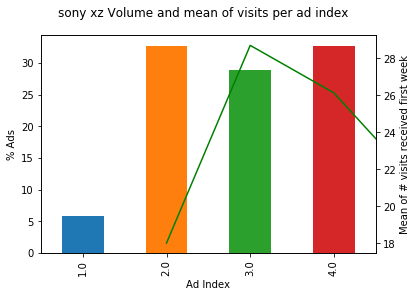

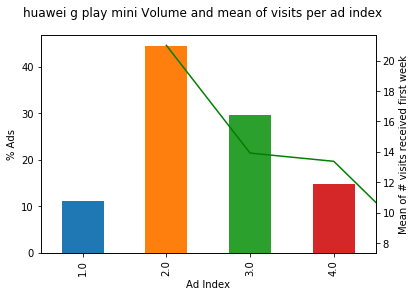

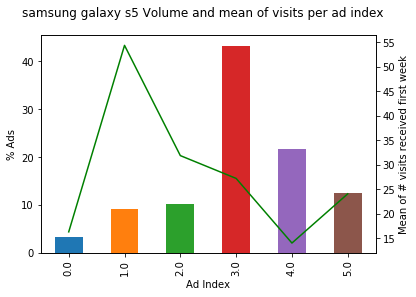

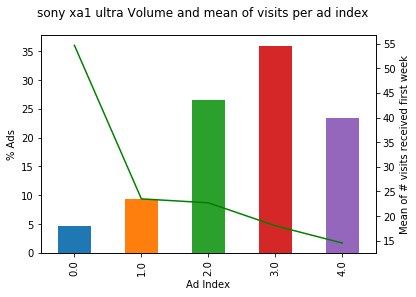

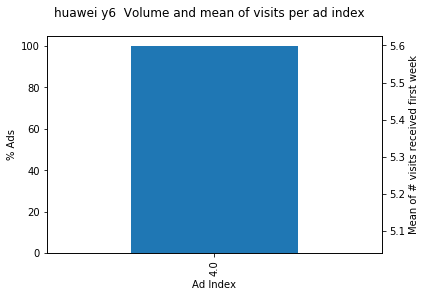

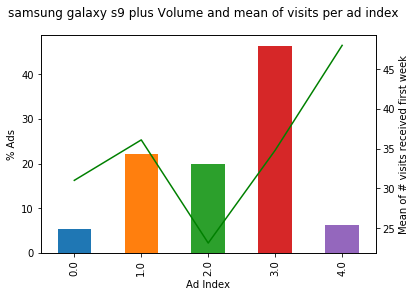

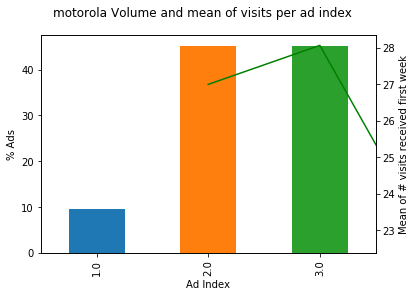

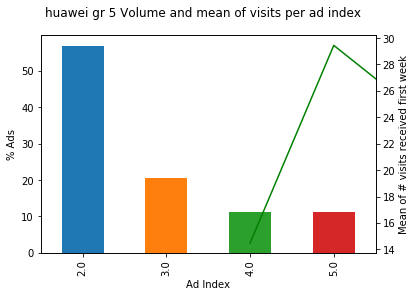

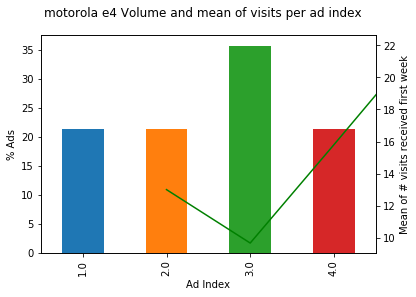

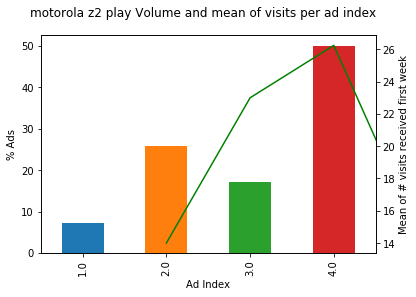

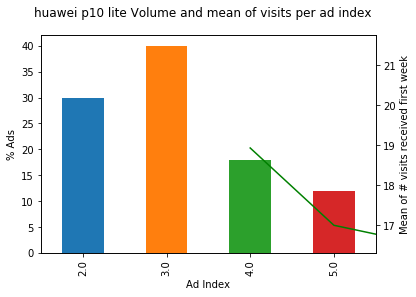

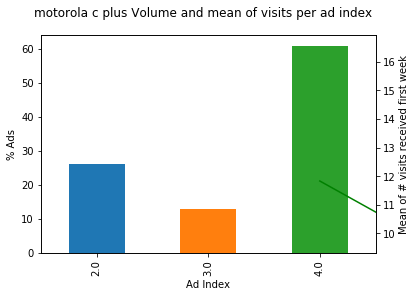

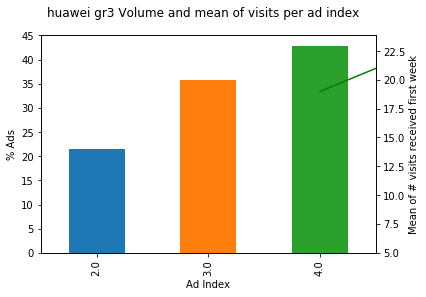

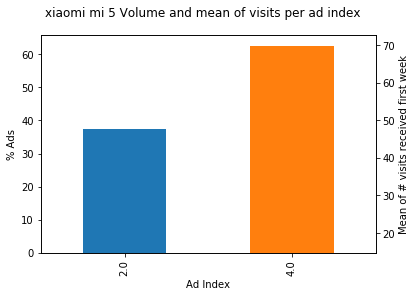

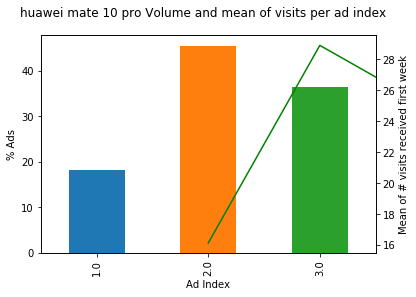

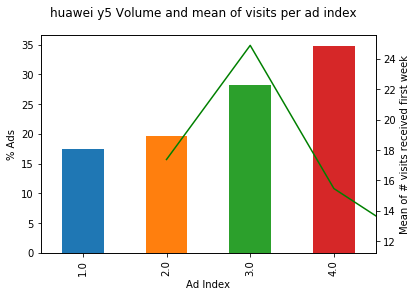

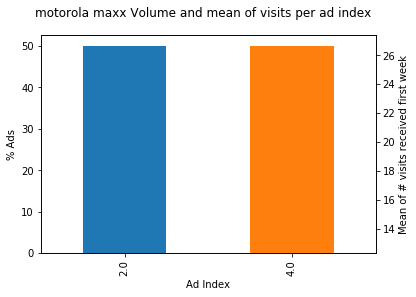

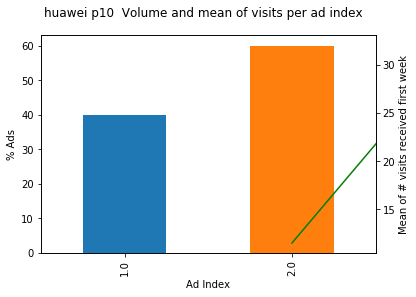

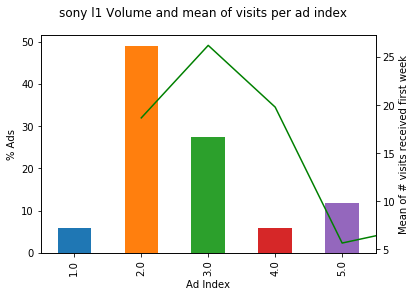

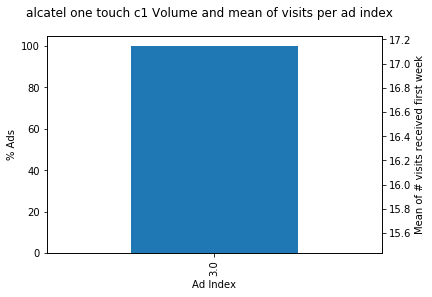

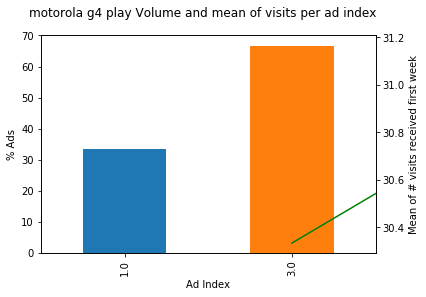

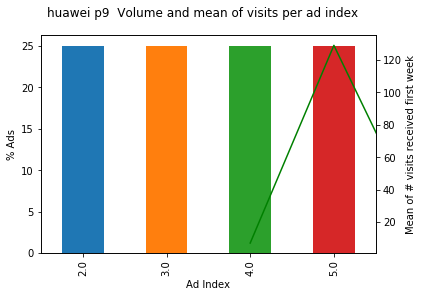

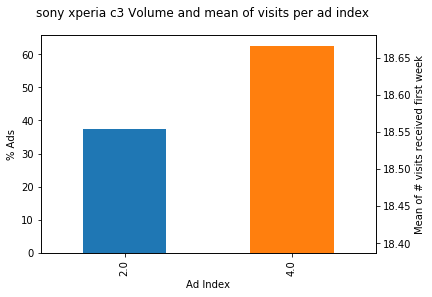

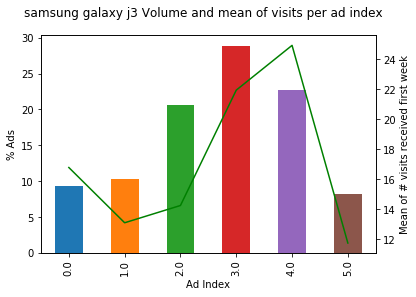

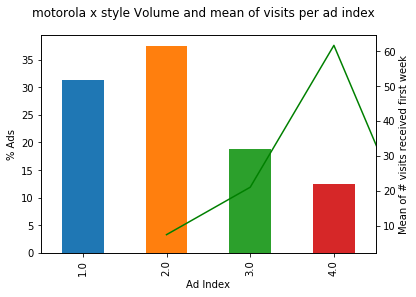

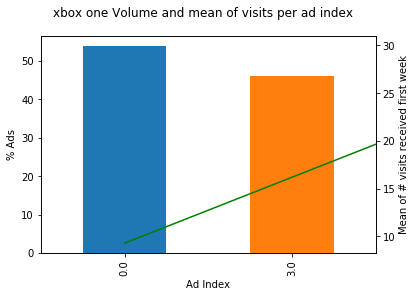

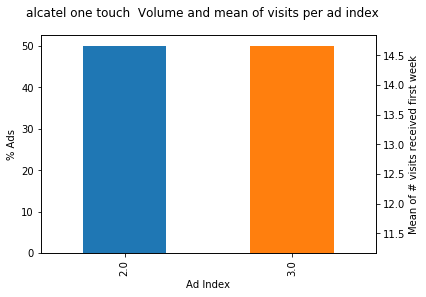

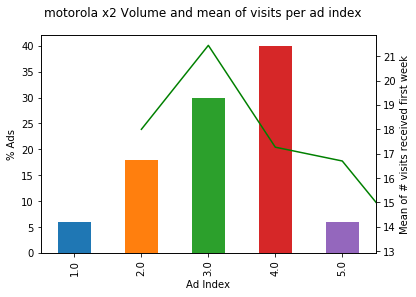

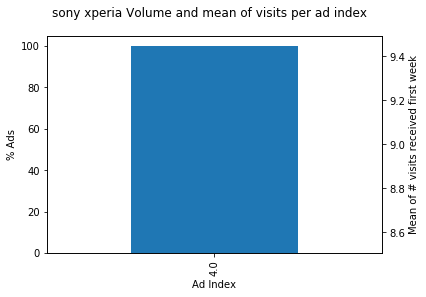

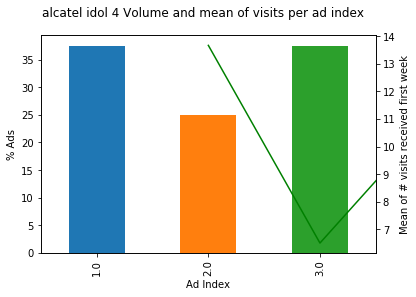

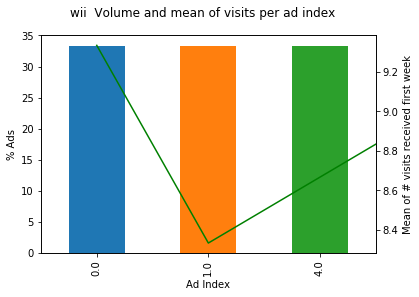

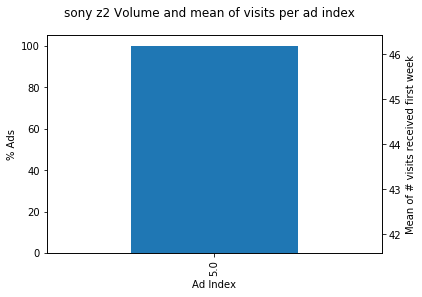

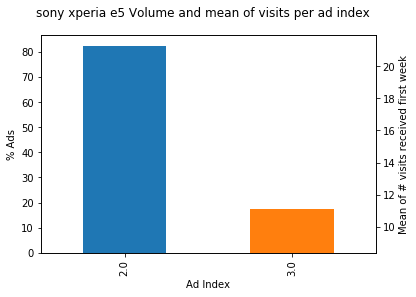

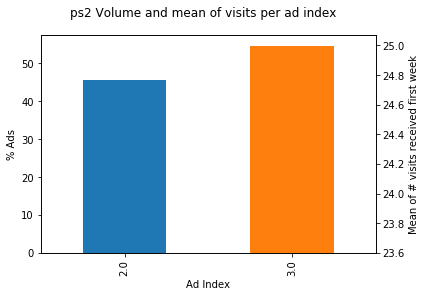

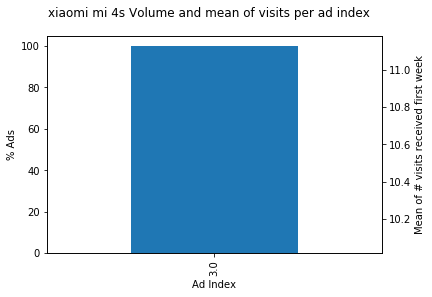

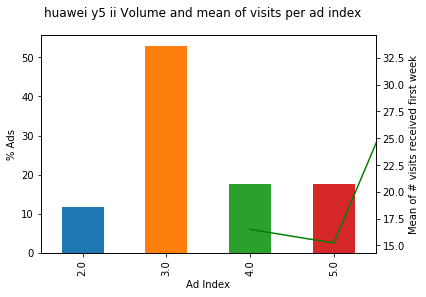

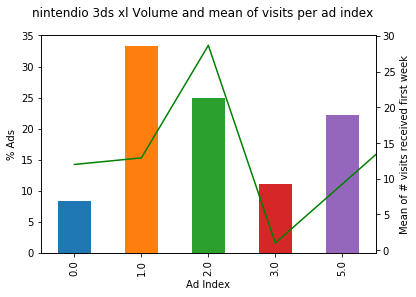

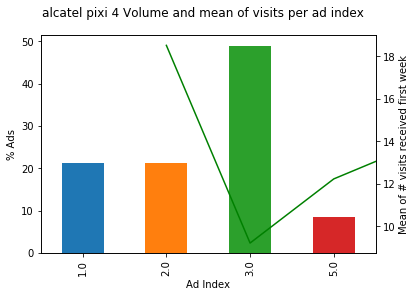

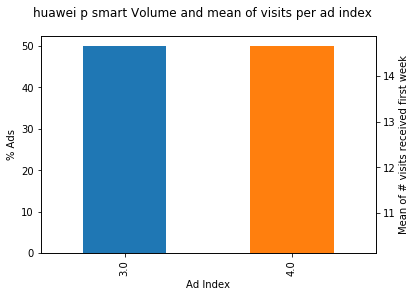

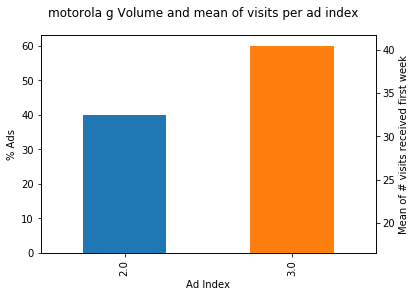

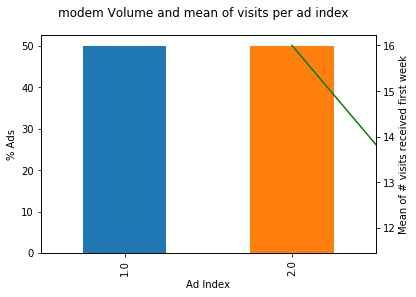

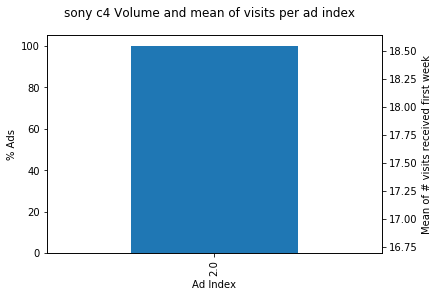

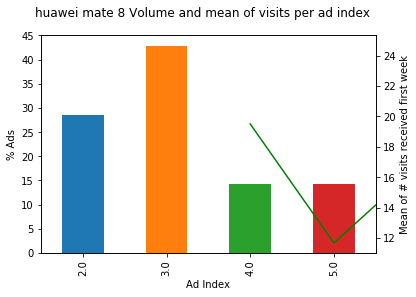

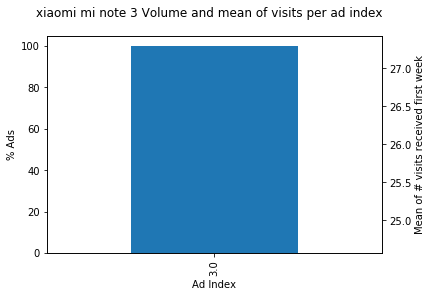

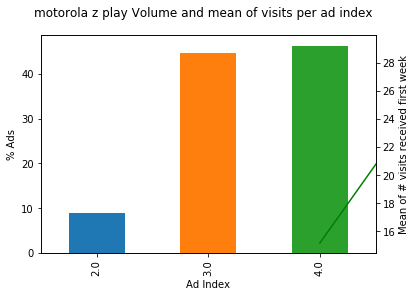

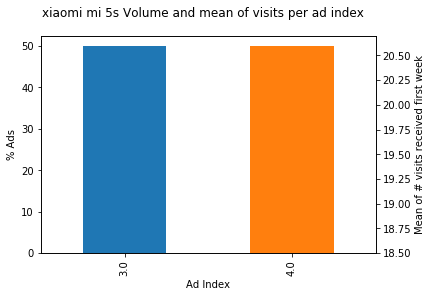

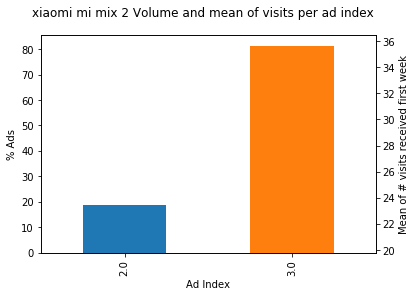

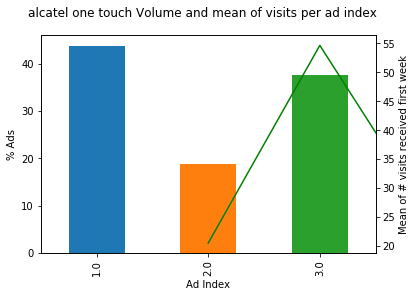

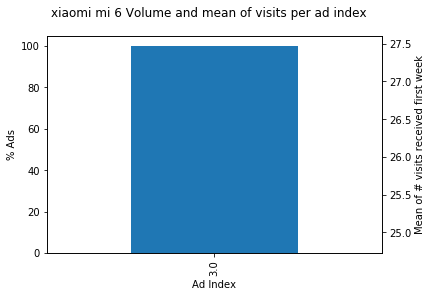

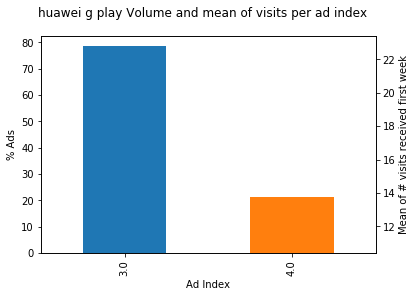

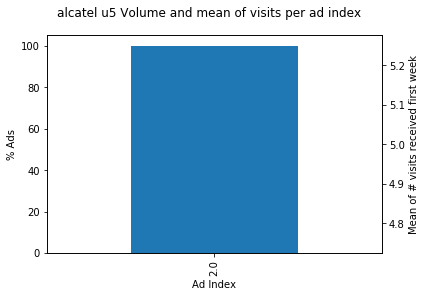

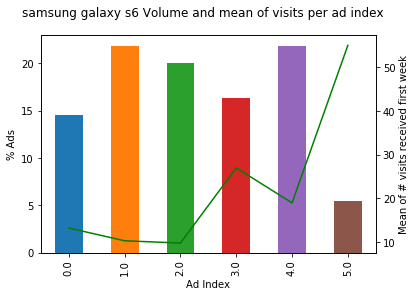

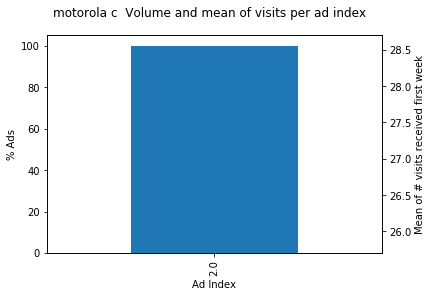

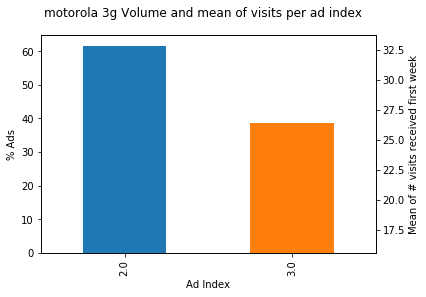

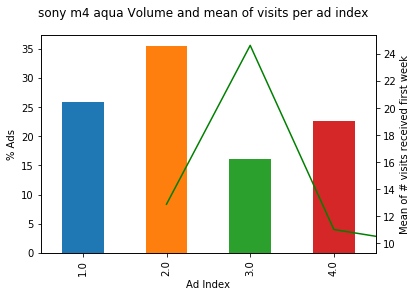

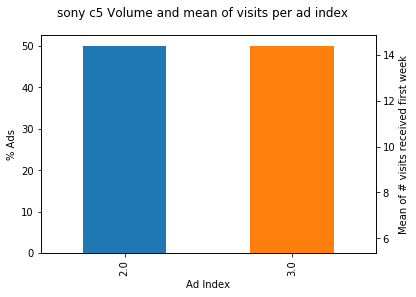

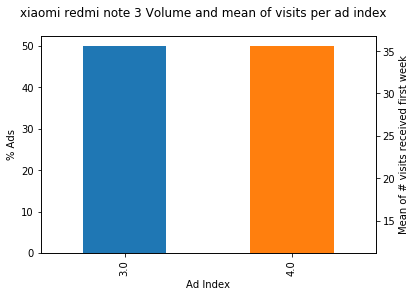

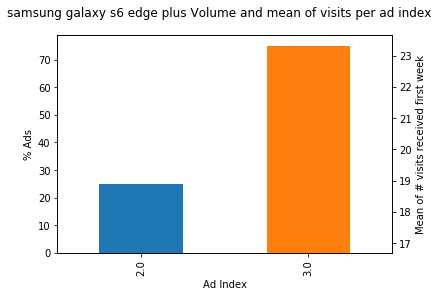

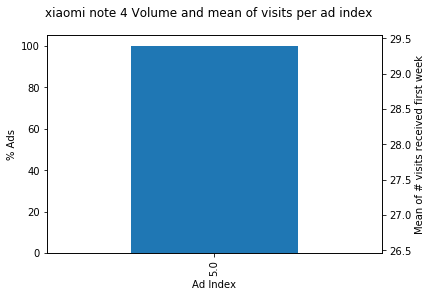

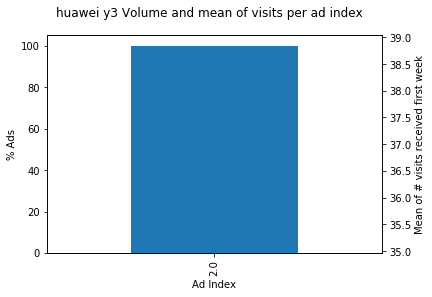

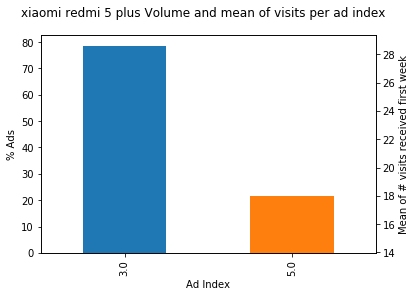

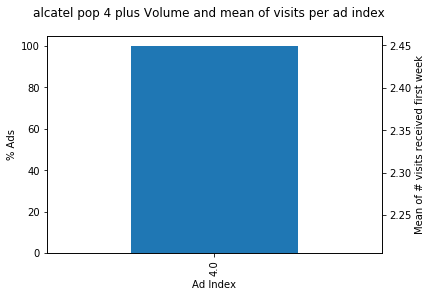

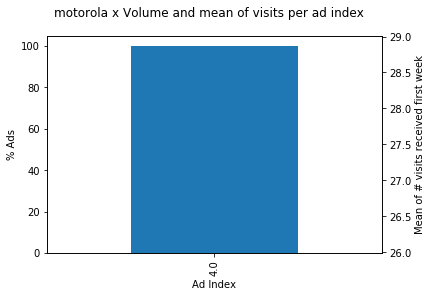

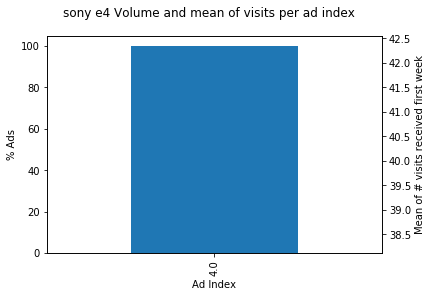

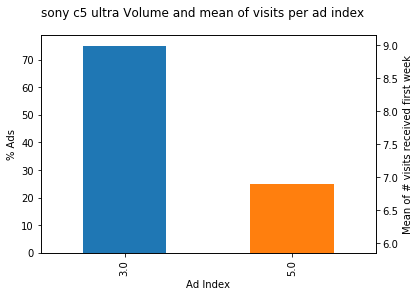

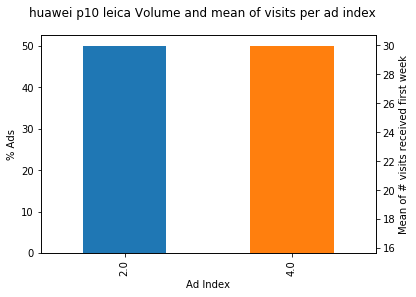

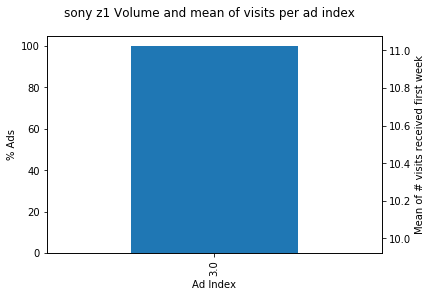

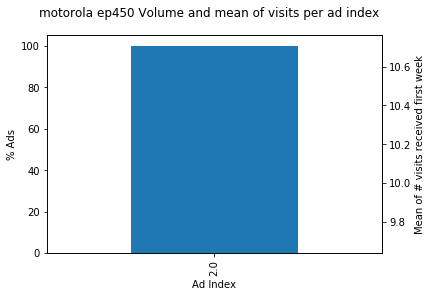

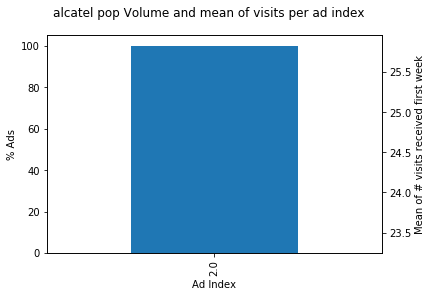

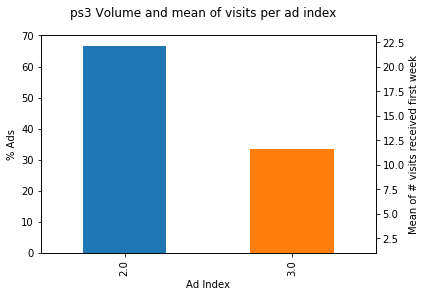

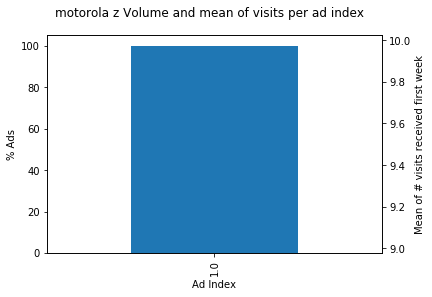

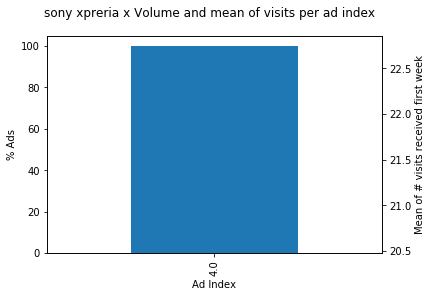

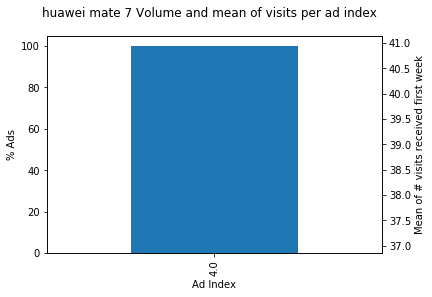

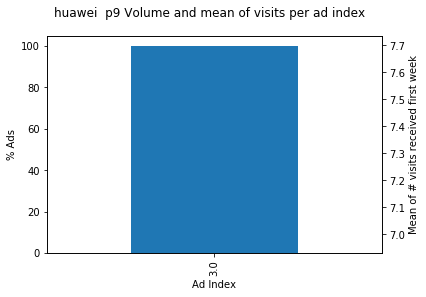

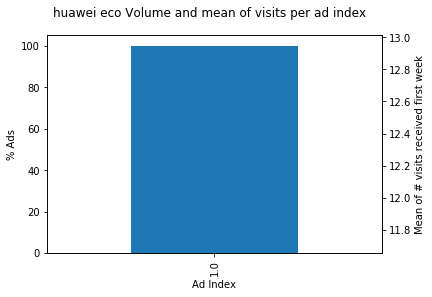

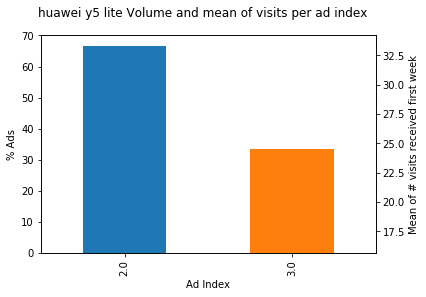

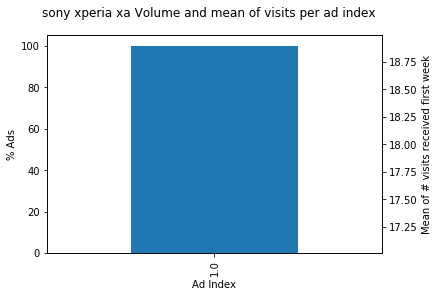

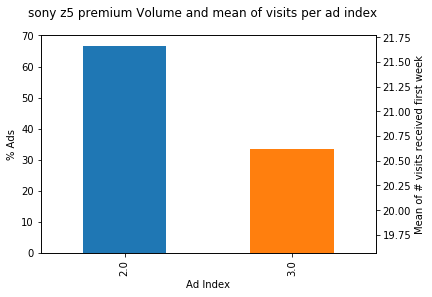

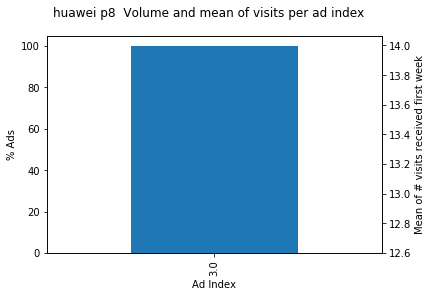

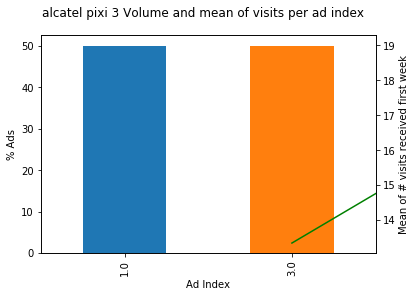

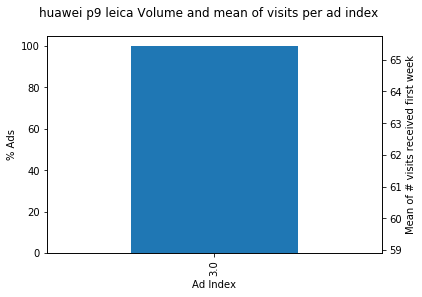

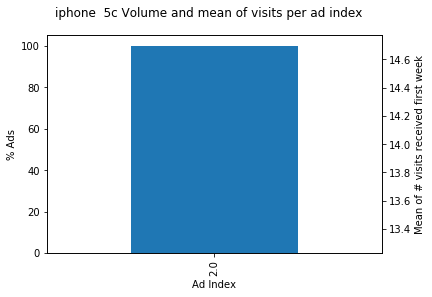

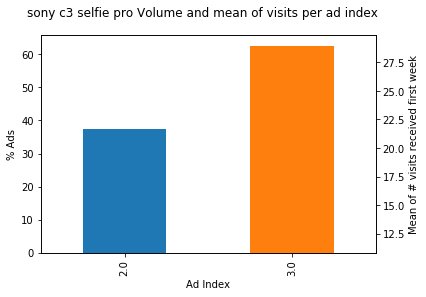

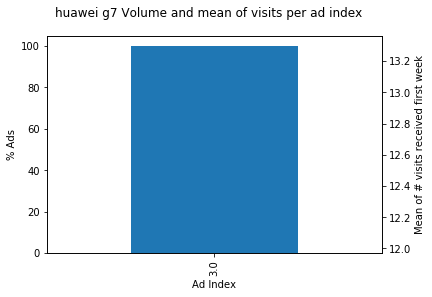

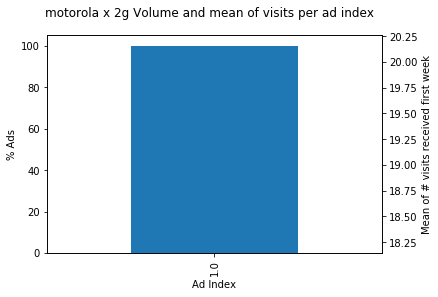

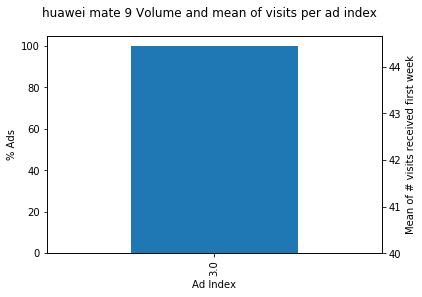

In [44]:
pn = df.product_name.unique()
for prod in pn:
    df_pn = df[df['product_name'] == prod].copy()
    visualize_quality_ad(df_pn,'visits',prod = prod)

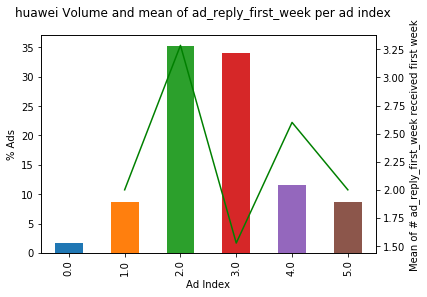

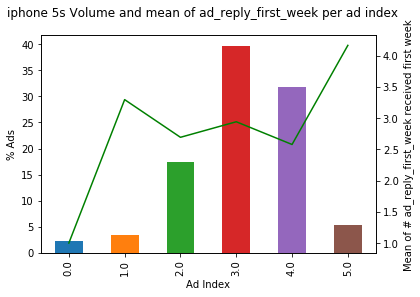

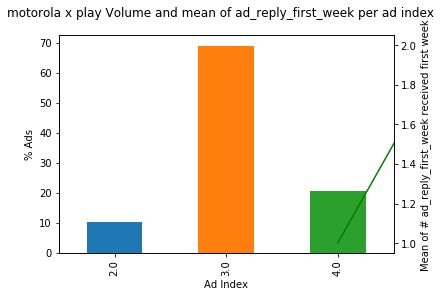

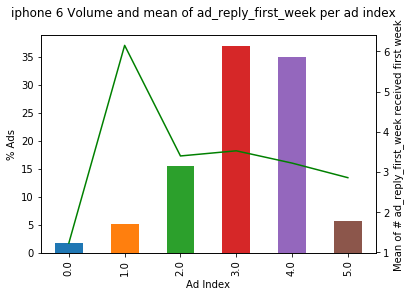

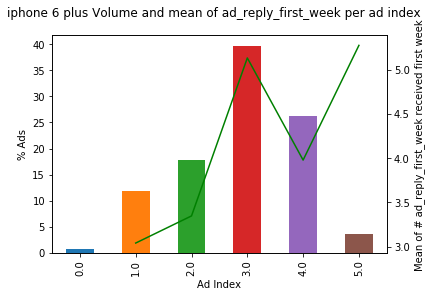

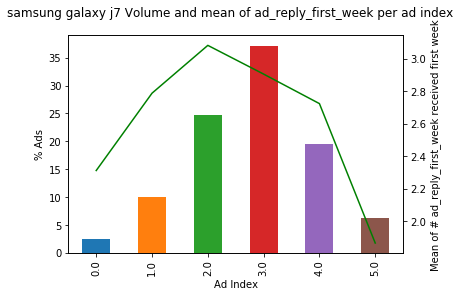

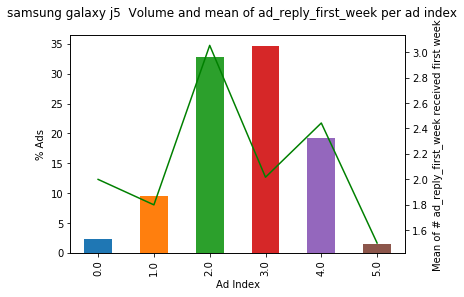

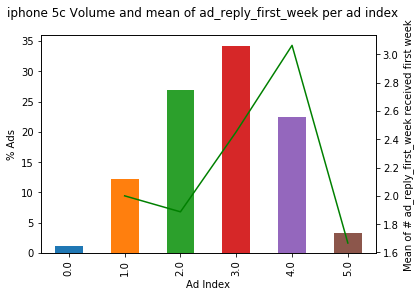

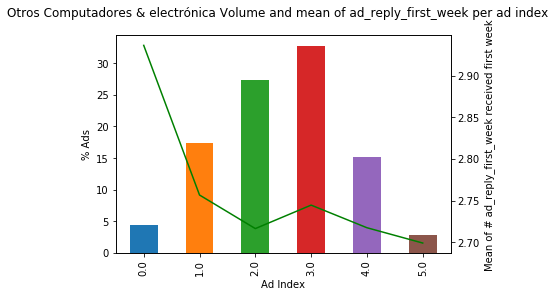

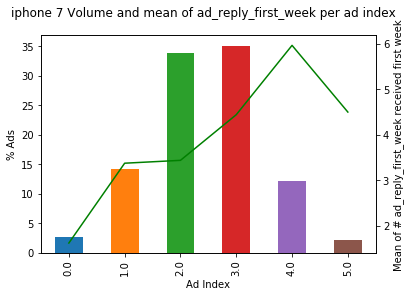

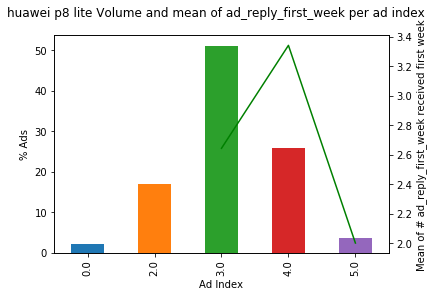

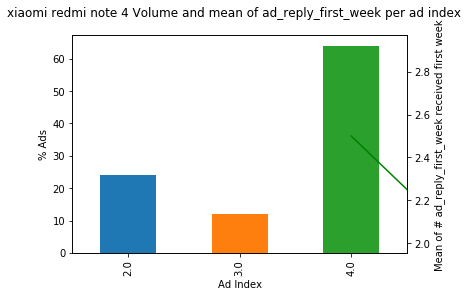

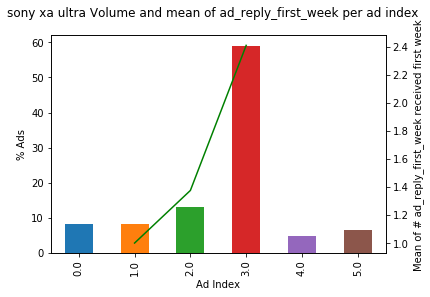

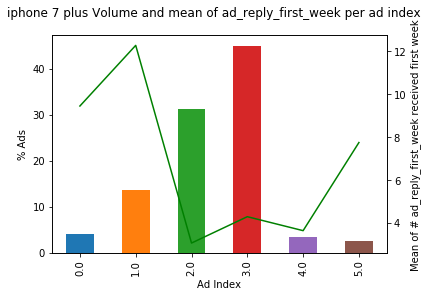

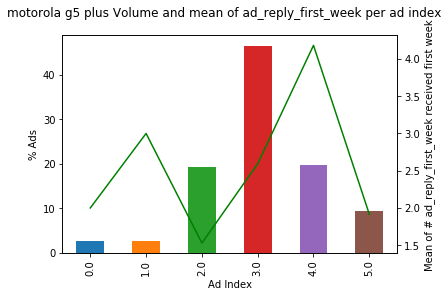

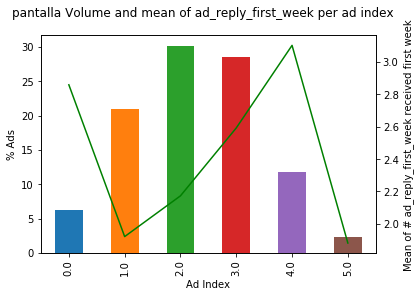

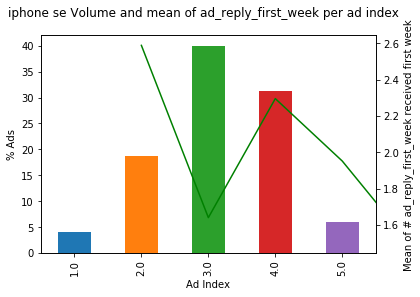

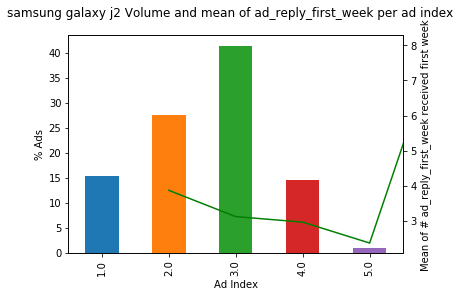

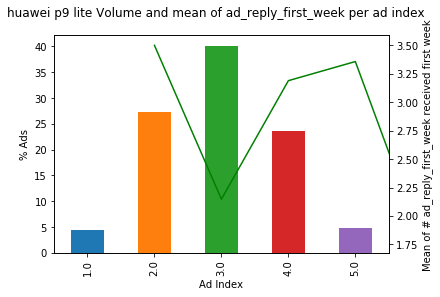

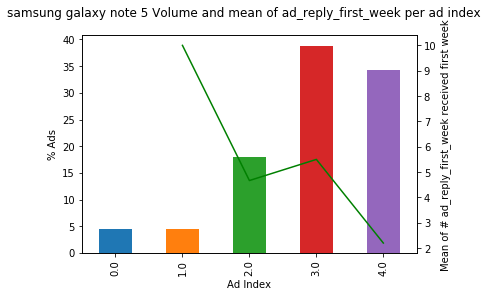

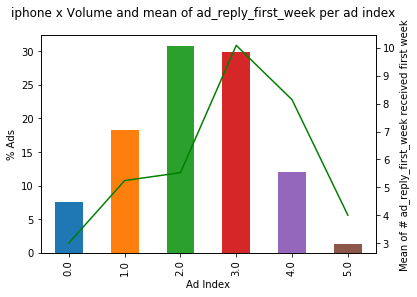

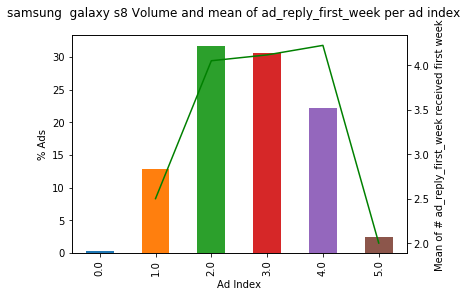

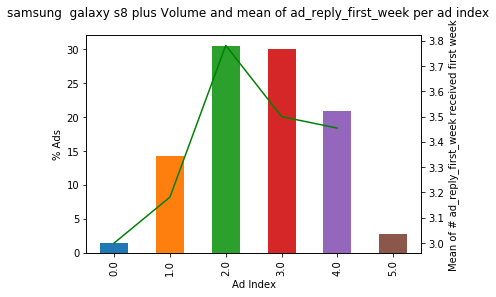

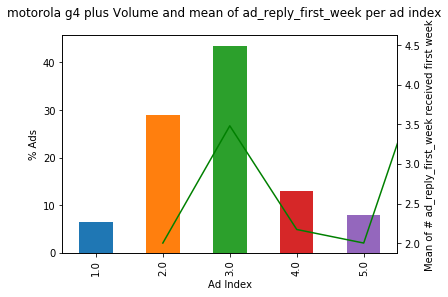

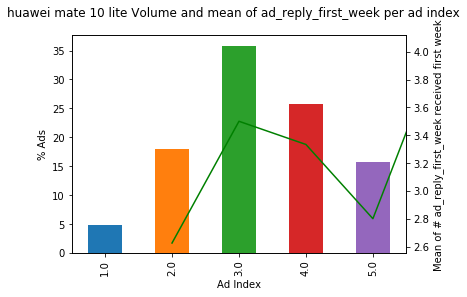

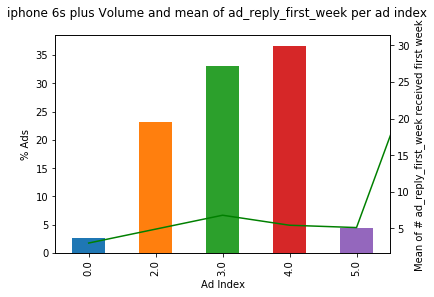

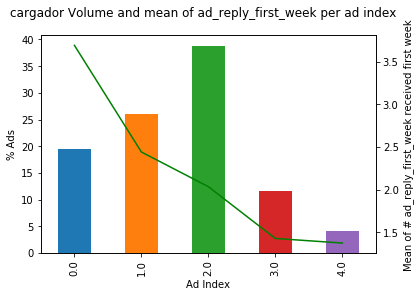

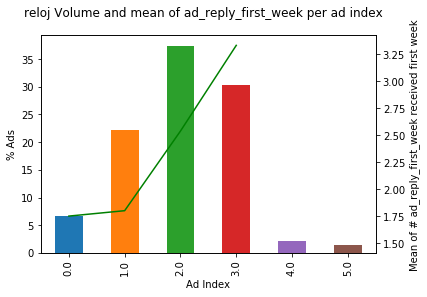

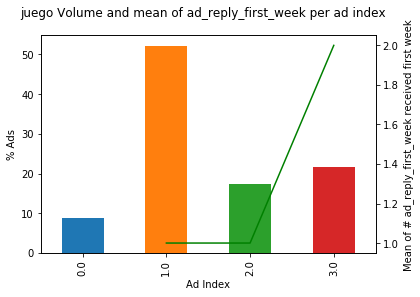

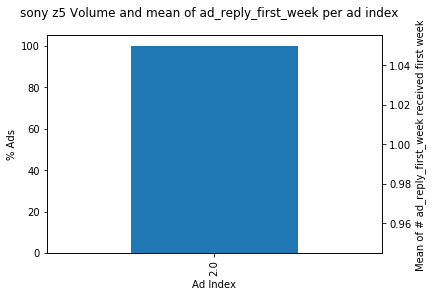

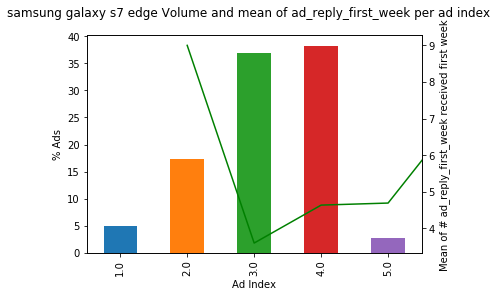

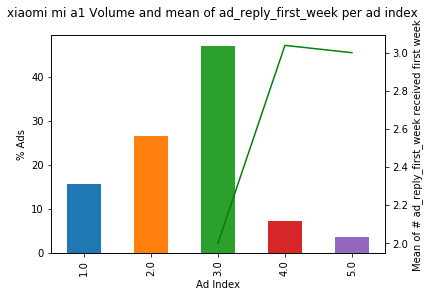

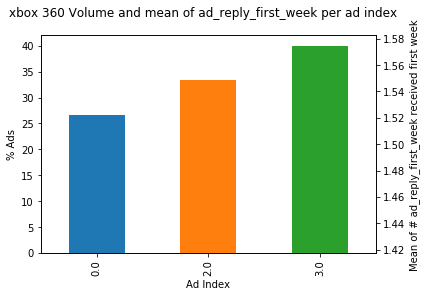

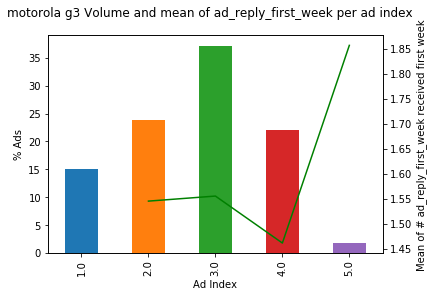

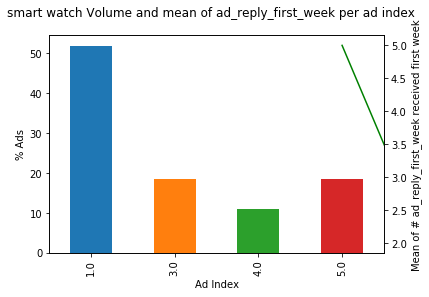

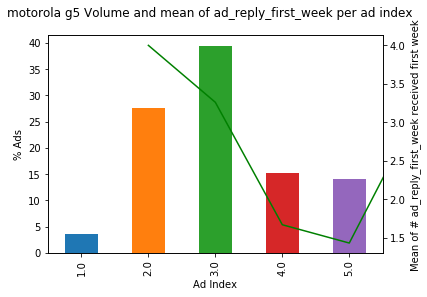

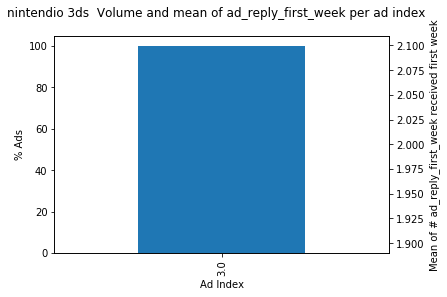

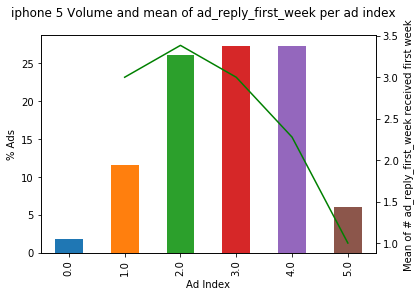

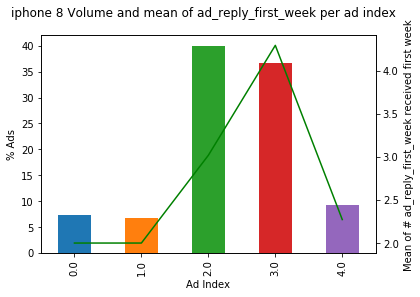

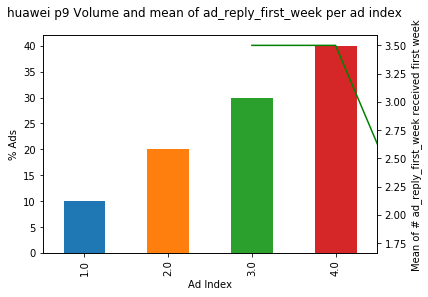

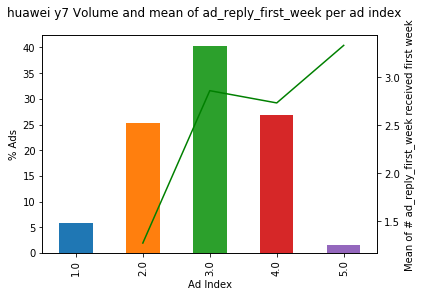

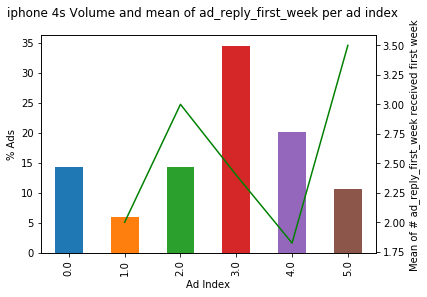

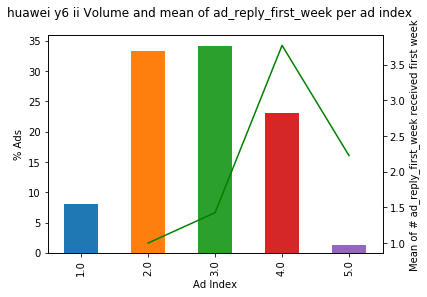

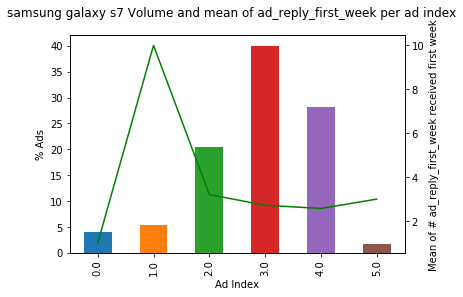

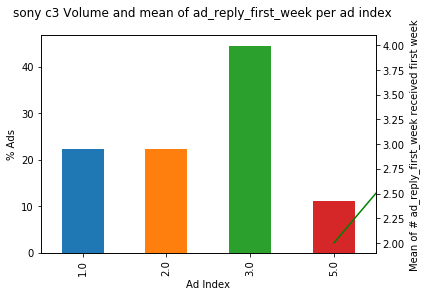

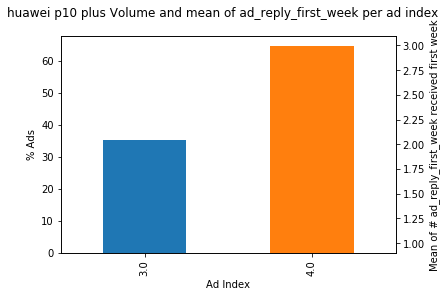

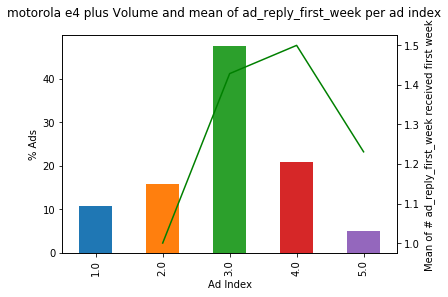

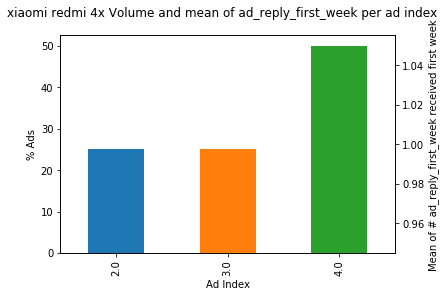

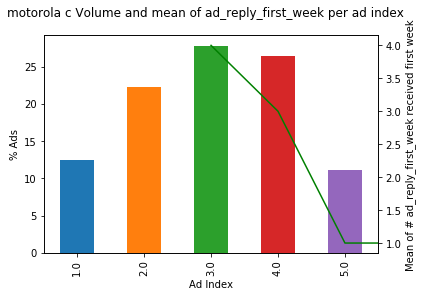

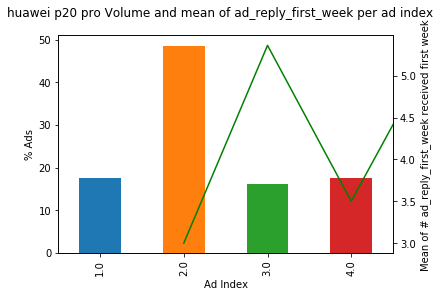

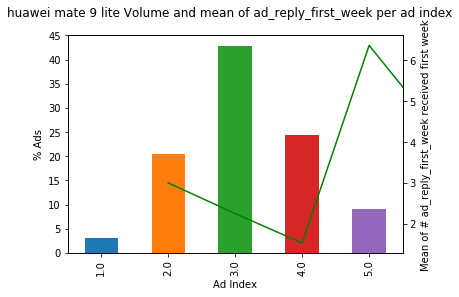

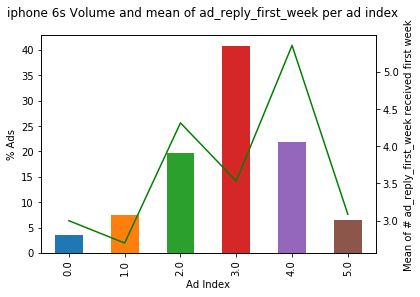

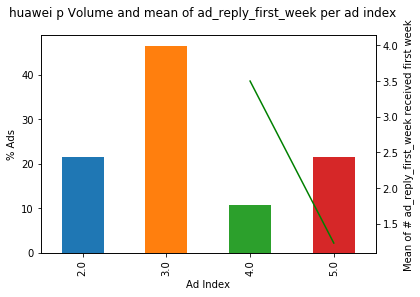

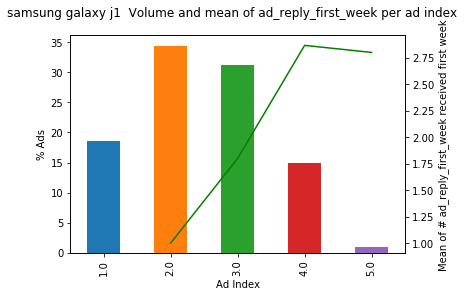

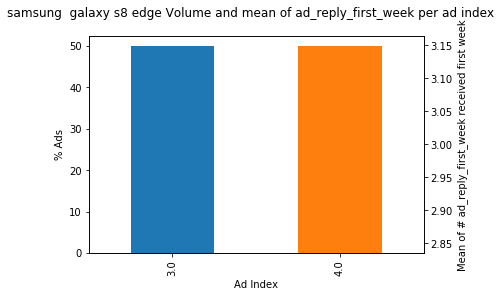

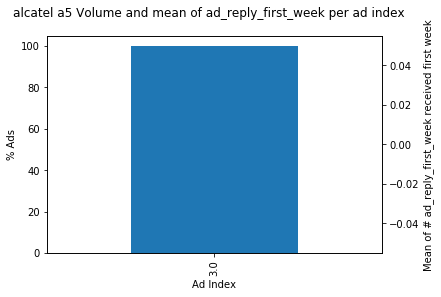

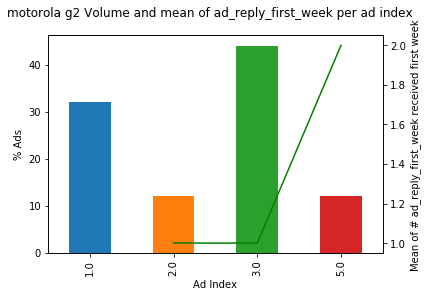

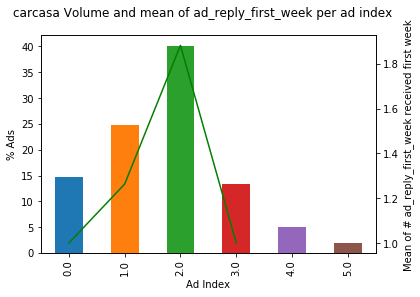

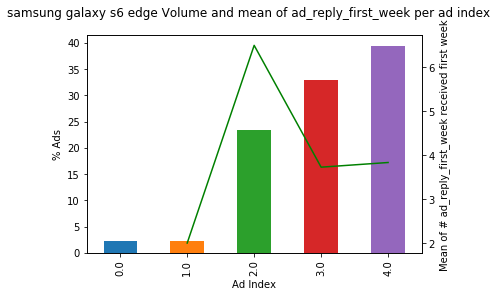

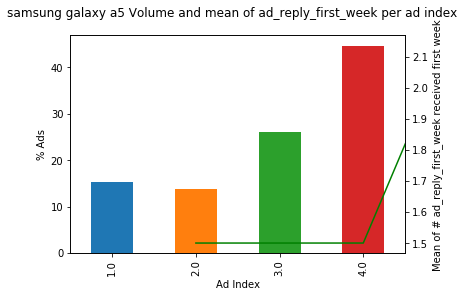

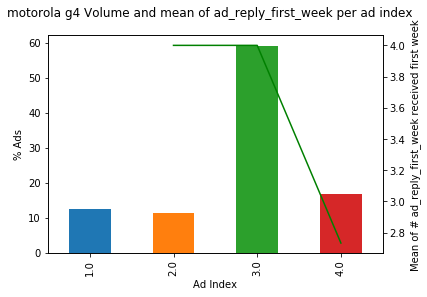

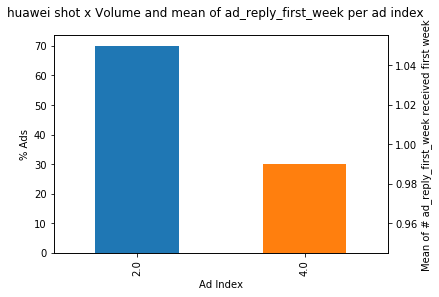

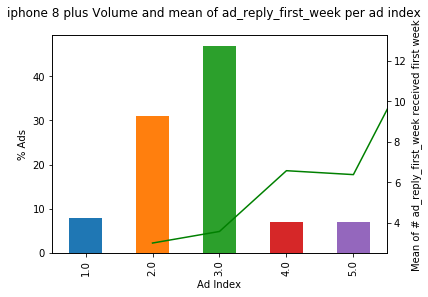

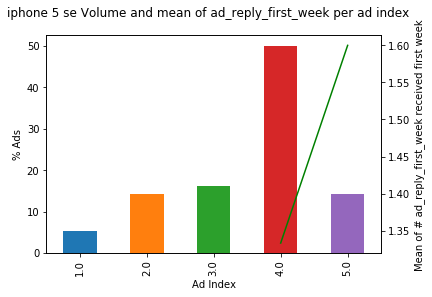

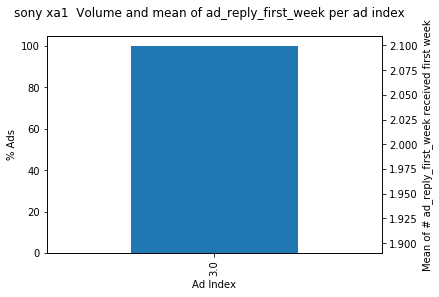

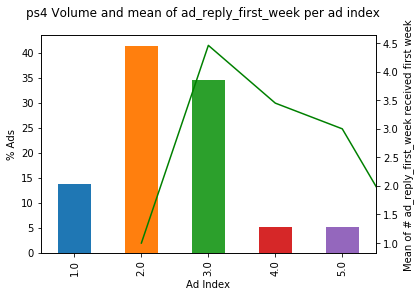

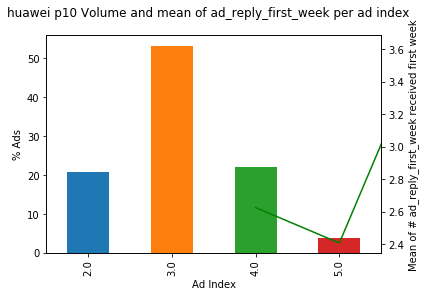

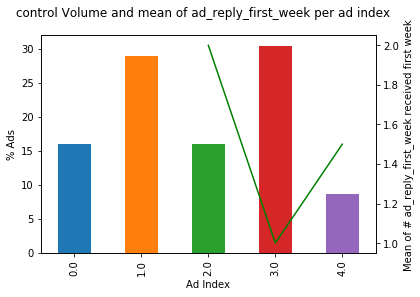

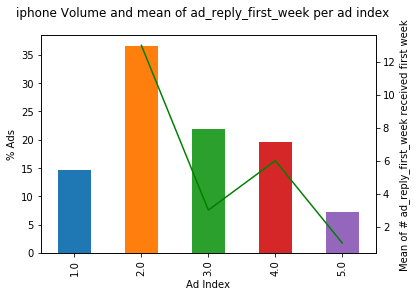

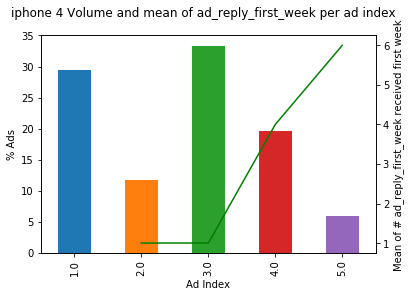

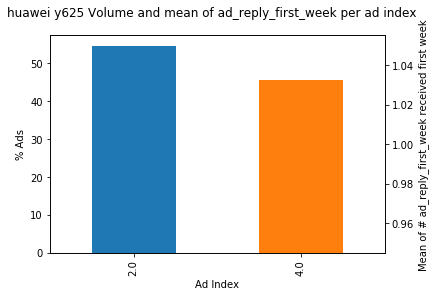

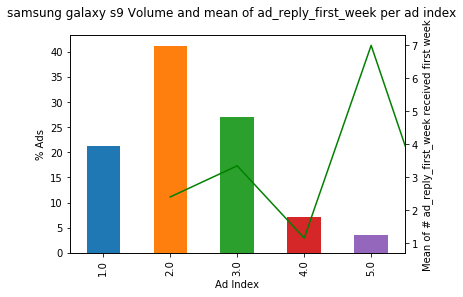

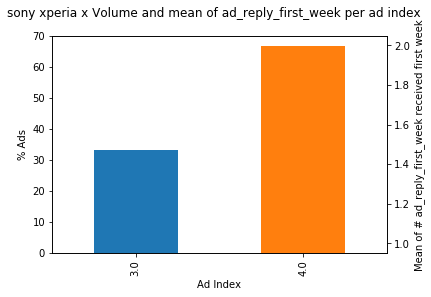

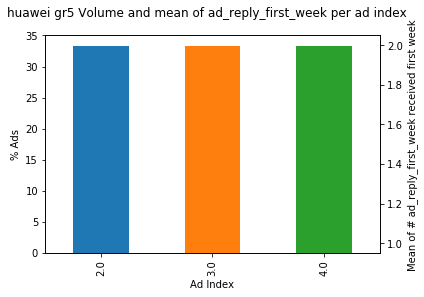

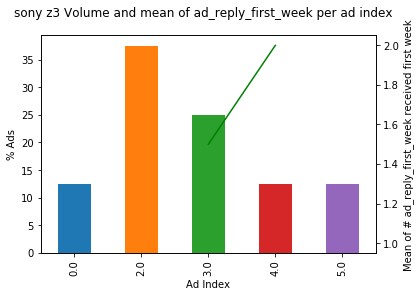

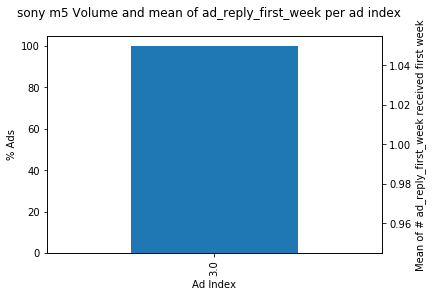

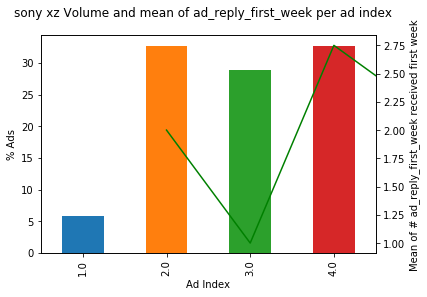

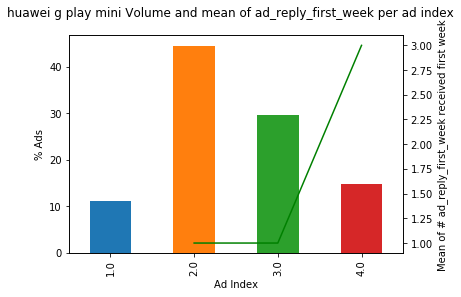

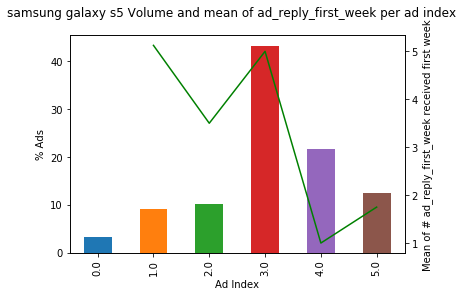

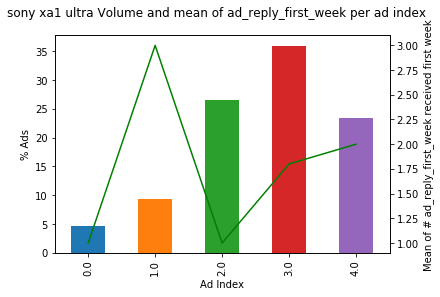

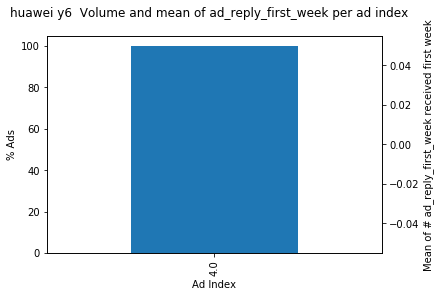

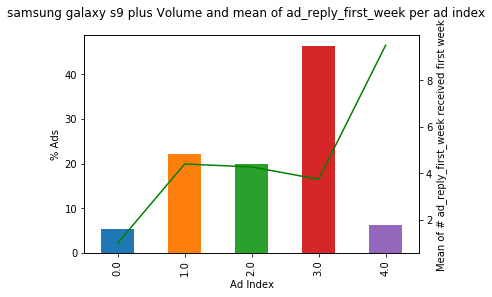

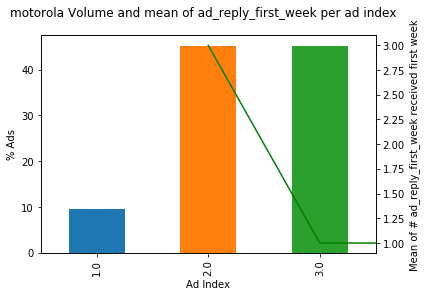

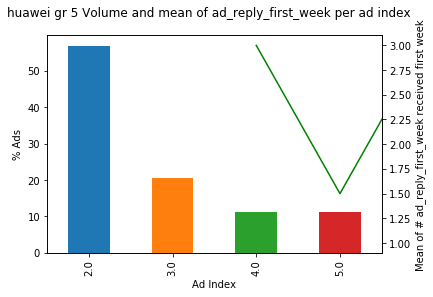

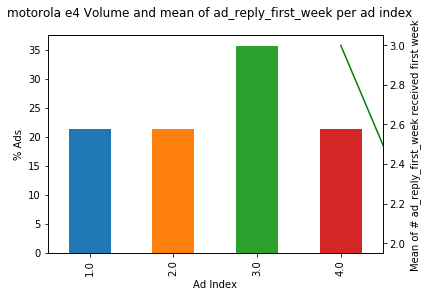

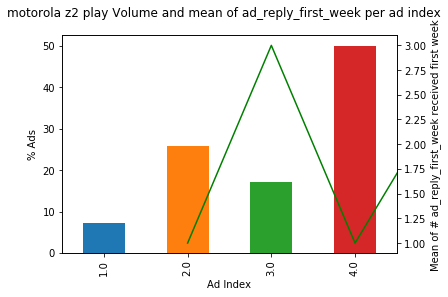

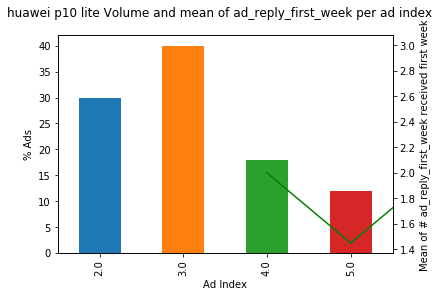

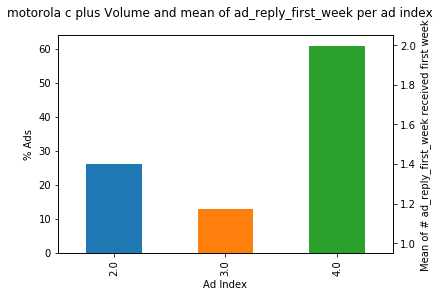

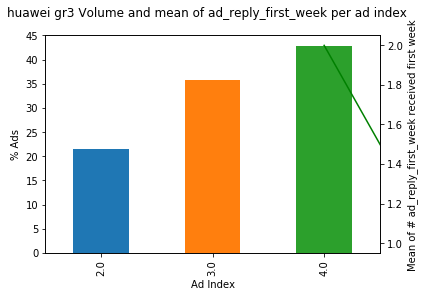

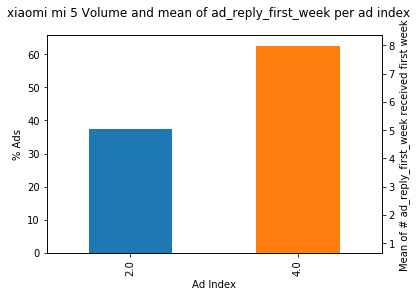

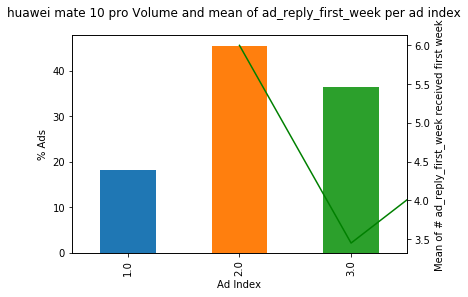

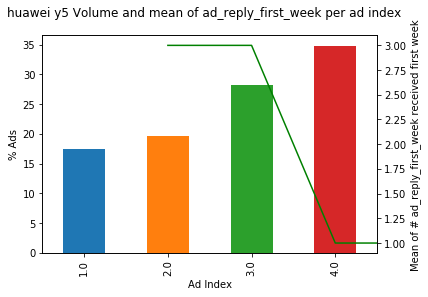

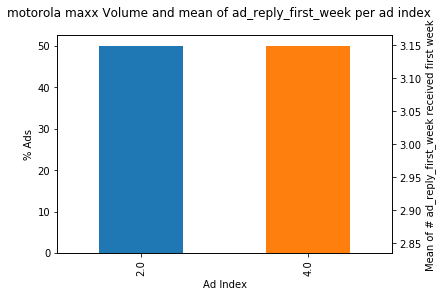

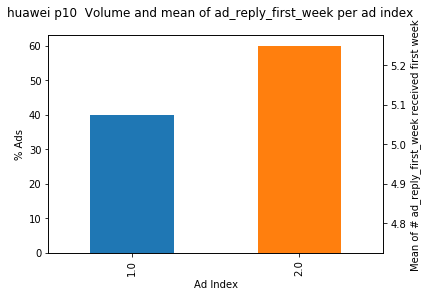

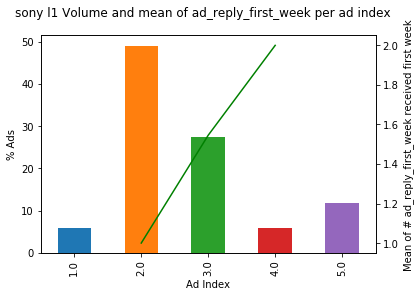

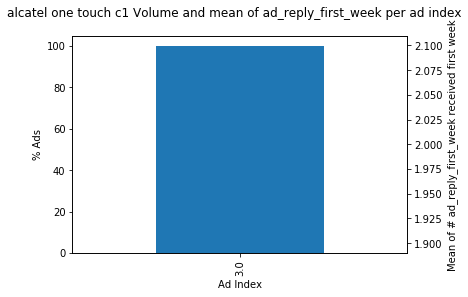

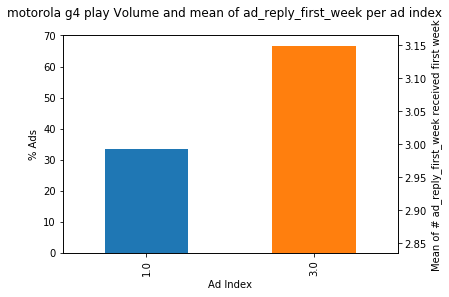

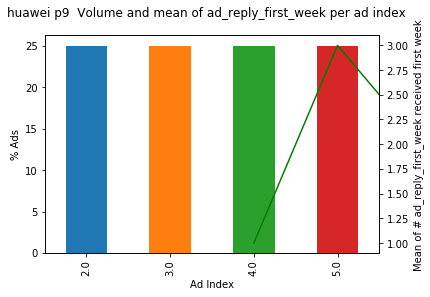

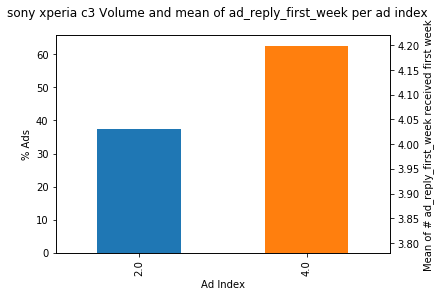

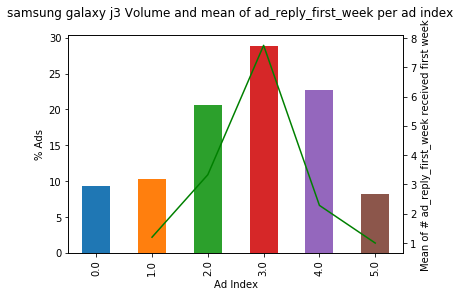

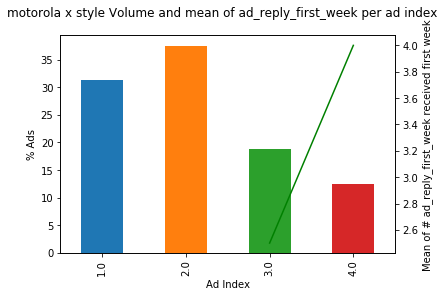

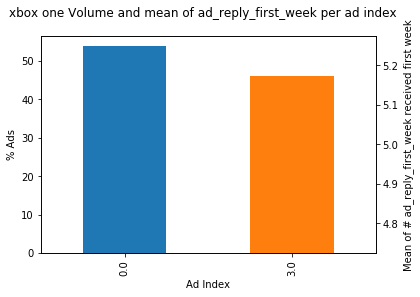

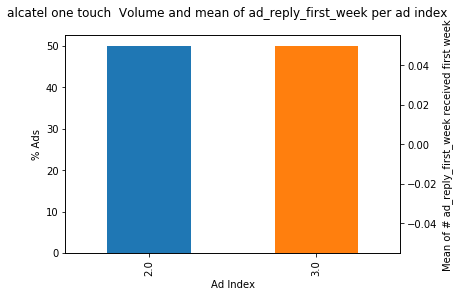

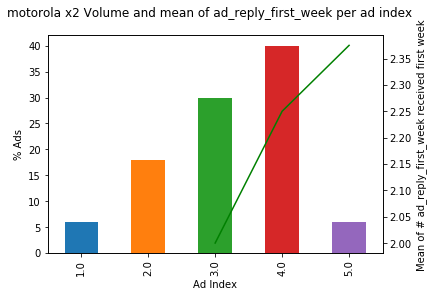

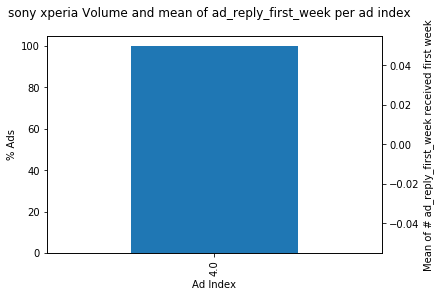

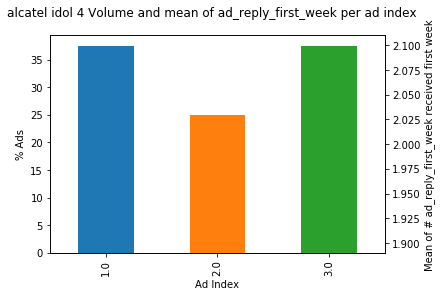

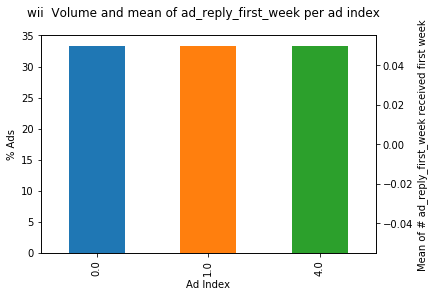

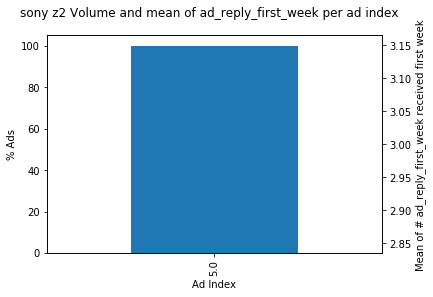

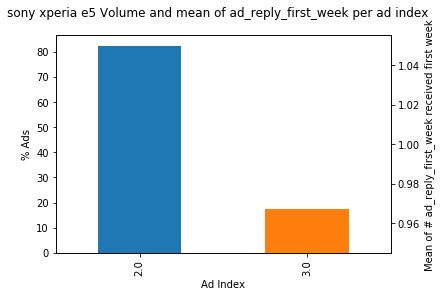

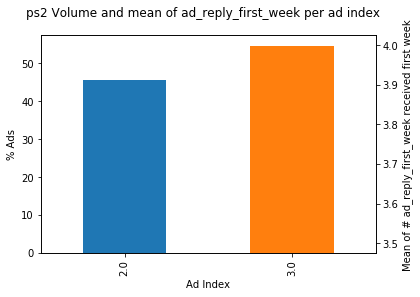

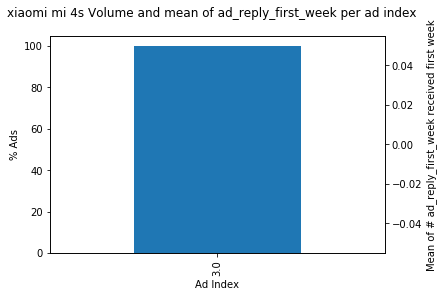

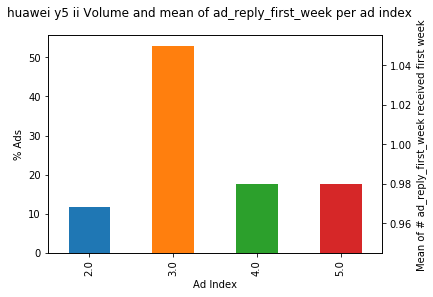

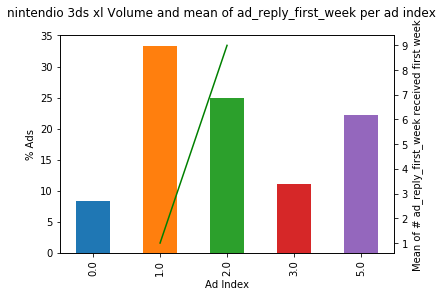

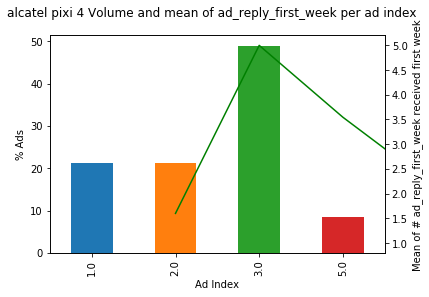

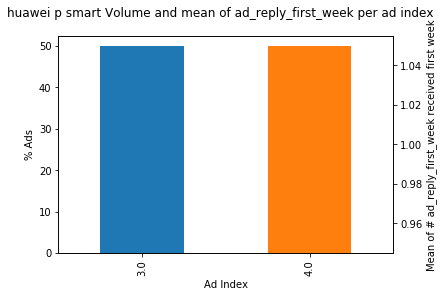

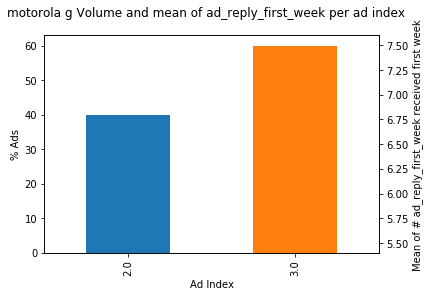

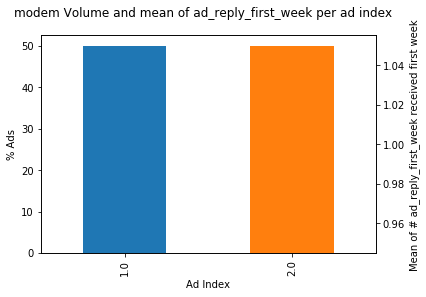

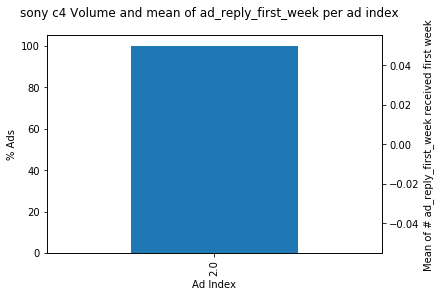

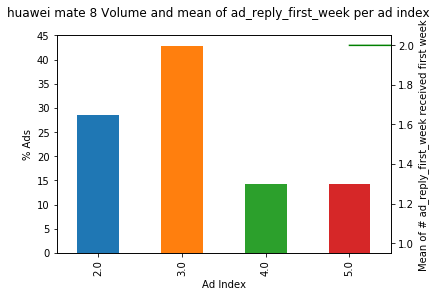

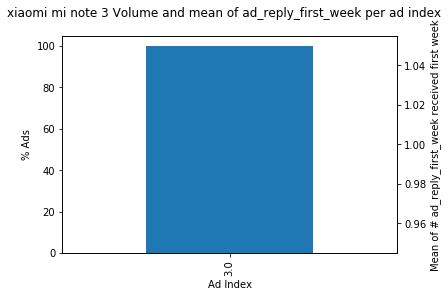

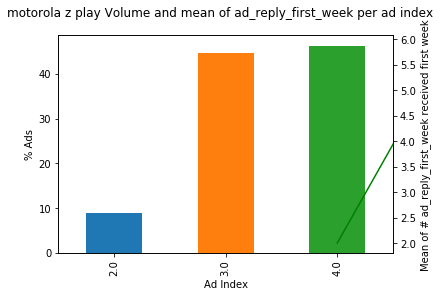

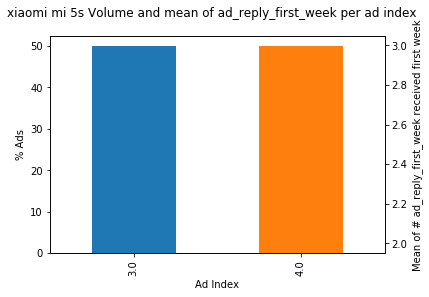

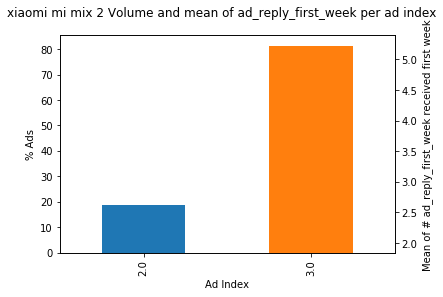

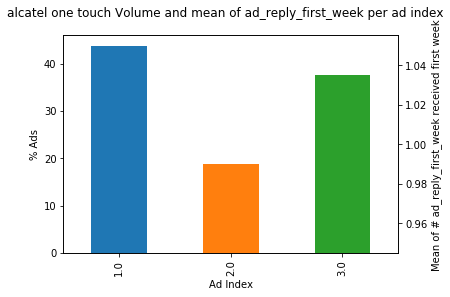

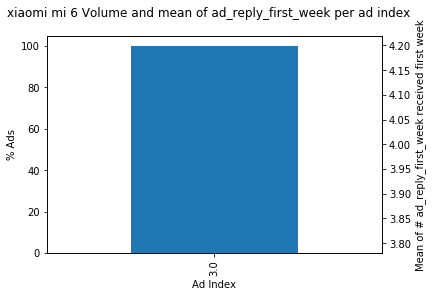

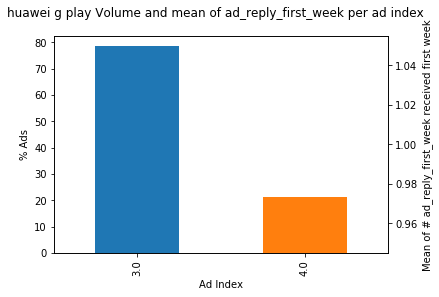

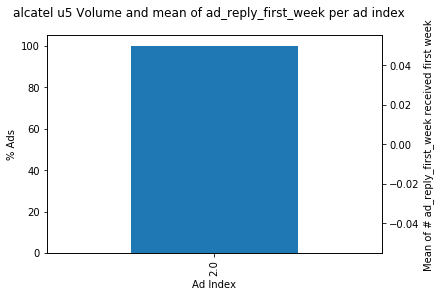

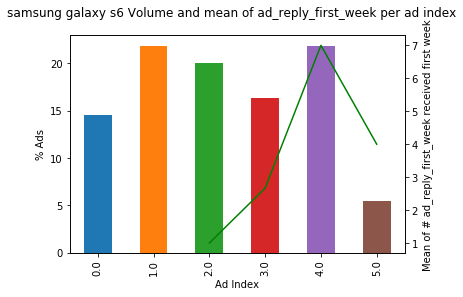

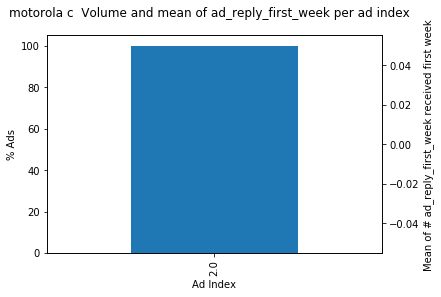

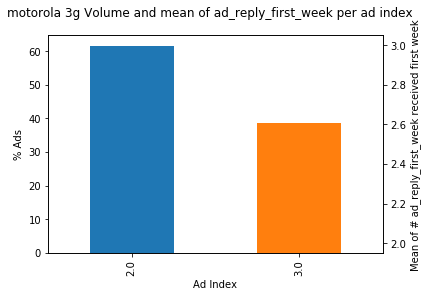

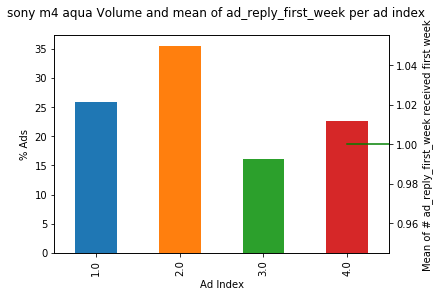

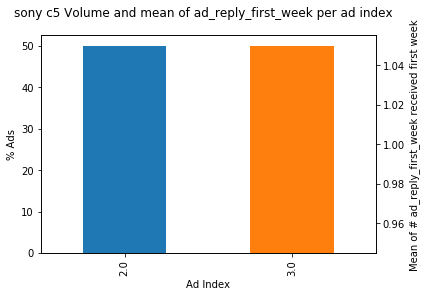

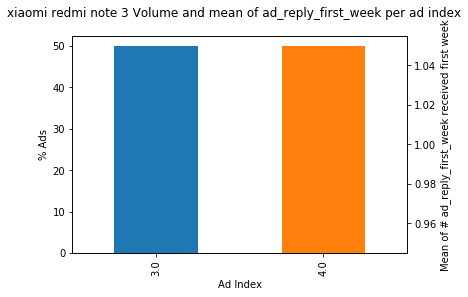

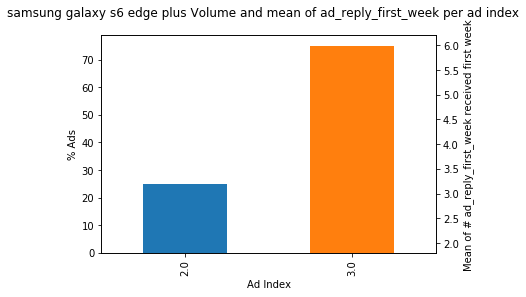

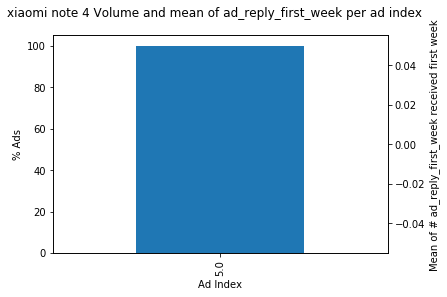

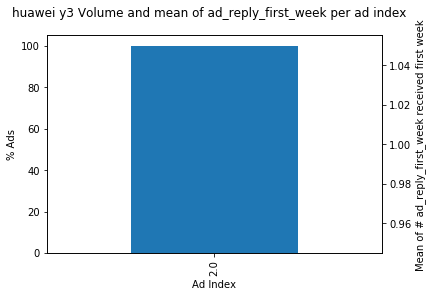

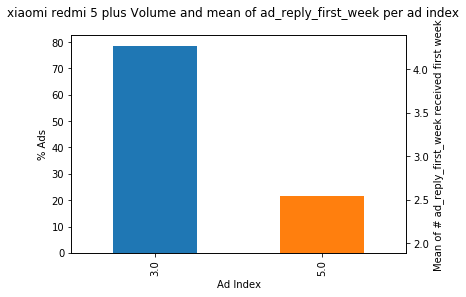

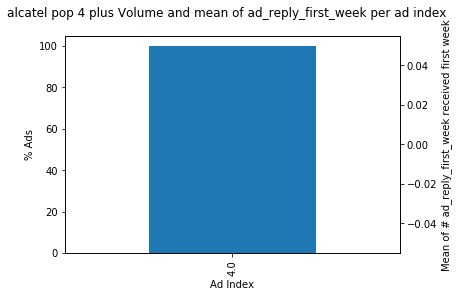

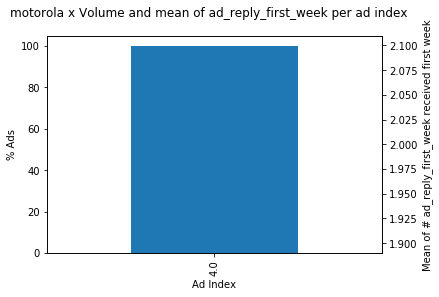

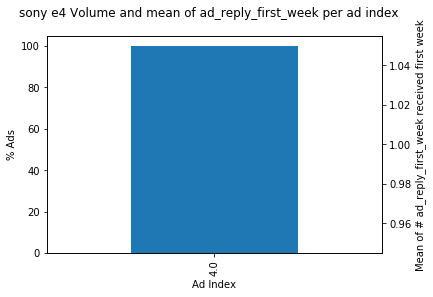

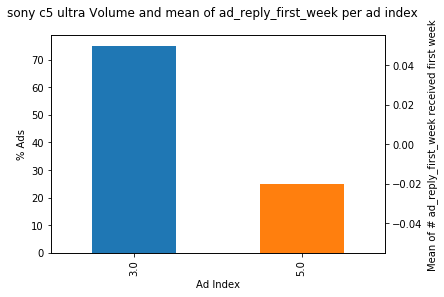

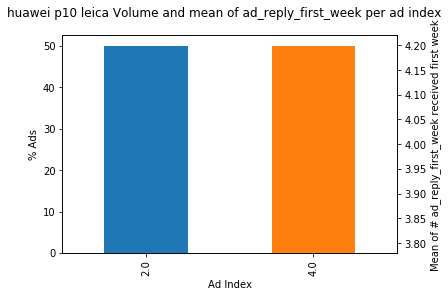

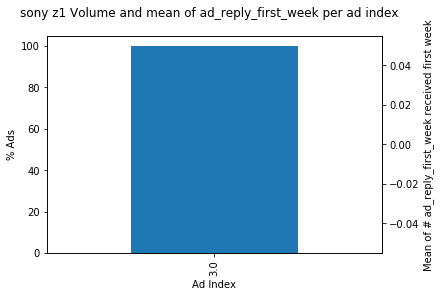

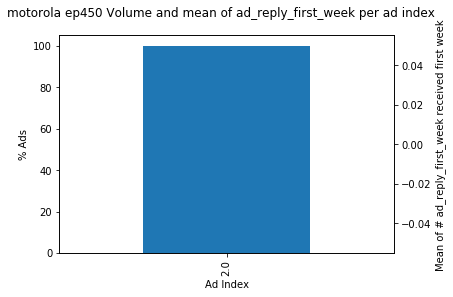

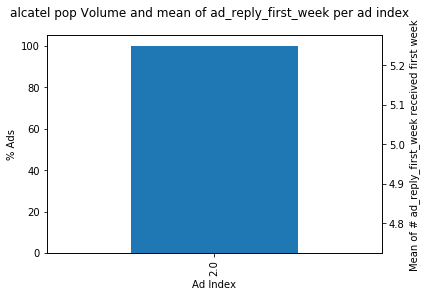

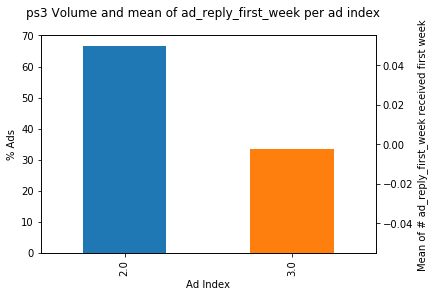

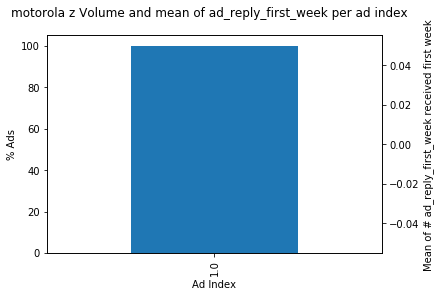

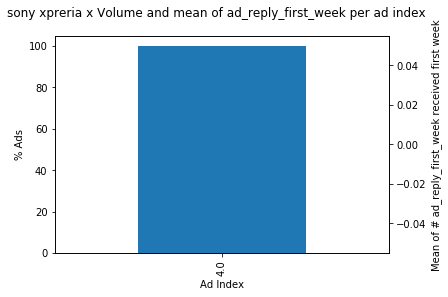

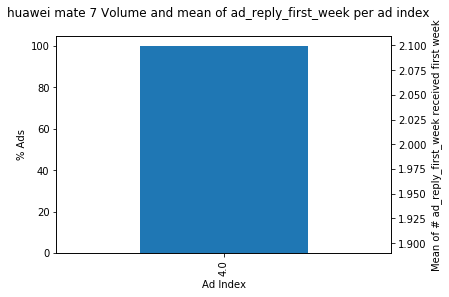

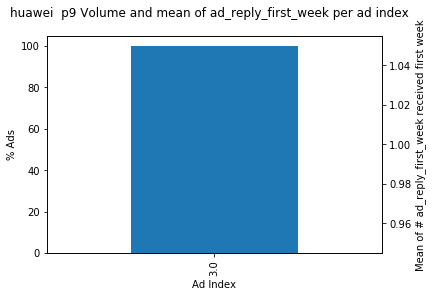

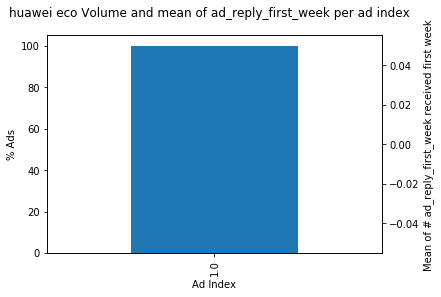

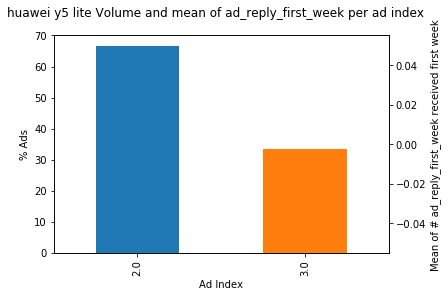

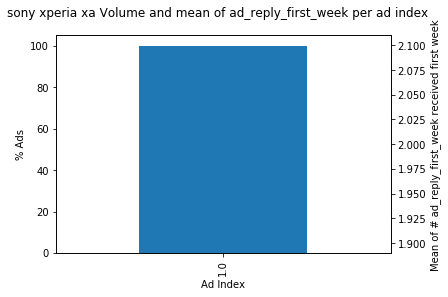

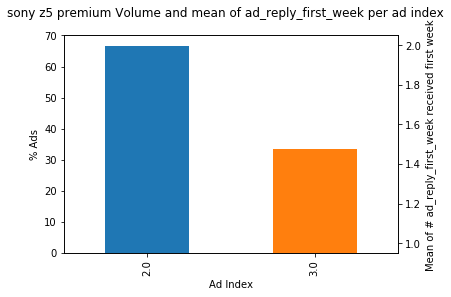

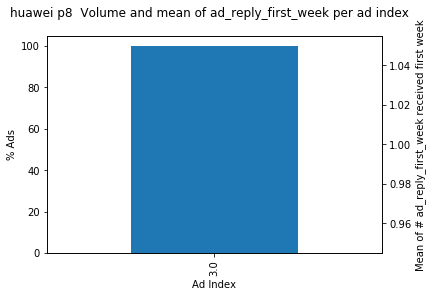

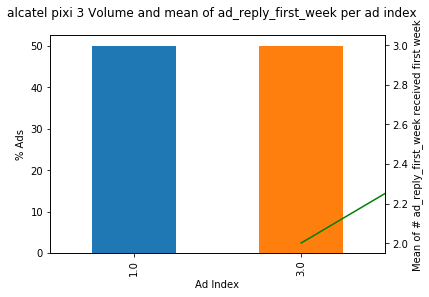

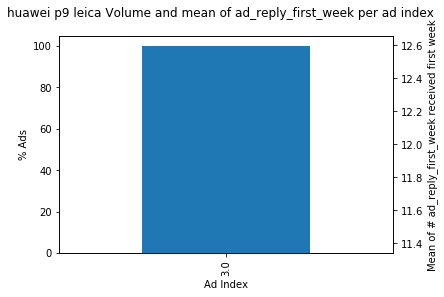

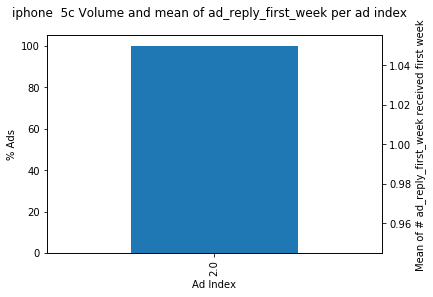

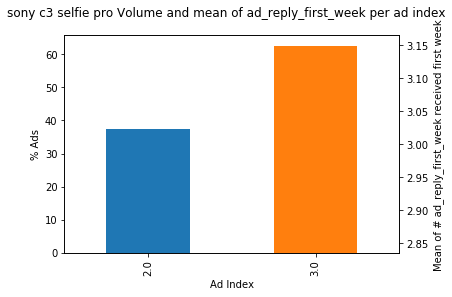

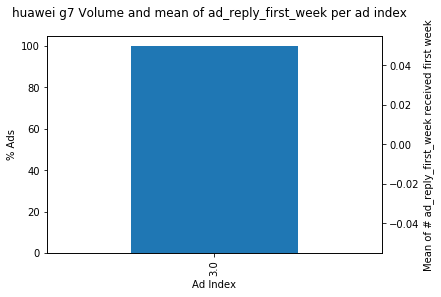

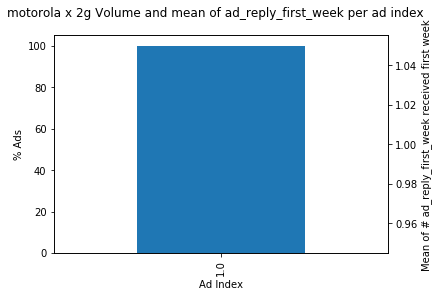

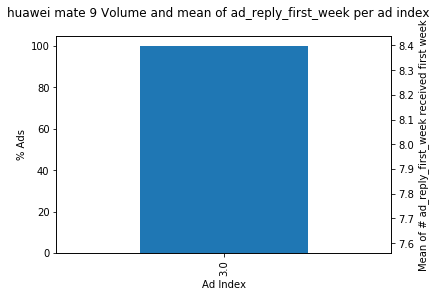

In [45]:
pn = df.product_name.unique()
for prod in pn:
    df_pn = df[df['product_name'] == prod].copy()
    visualize_quality_ad(df_pn,'ad_reply_first_week',prod = prod)